### Step 1: Importing Data

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Importing all datasets
lead_score=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\New folder\case study\Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# Let's see the type of each column
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Let's check the dimensions of the dataframe
lead_score.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_score.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Preparation

In [6]:
#Checking for duplicates

In [7]:
lead_score.duplicated(subset=["Prospect ID","Lead Number"]).sum()

0

### Exploratory Data Analysis

In [8]:
#Dropping unnecessary columns
lead1_score=lead_score.drop(['Prospect ID','Lead Number'],axis=1)
lead1_score

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


###### Converting select values to nan in the columns which has select as the entry .


In [9]:
lead1_score = lead1_score.replace('Select', np.nan)
lead1_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Cheching count of null values
lead1_score.isnull().sum()


Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#Checking percentage of null values
round(100*(lead1_score.isnull().sum())/len(lead1_score.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#Dropping columns having more than 40% missing values
columns=lead1_score.columns
for i in columns:
    if((100*(lead1_score[i].isnull().sum())/(len(lead1_score.index)))>=40):
        lead1_score.drop(i,1,inplace=True)
       
        

In [13]:
round(100*(lead1_score.isnull().sum())/len(lead1_score.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
lead1_score.shape


(9240, 28)

In [15]:
lead1_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [16]:
lead1_score.select_dtypes(include=['category', object]).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Catogorical Variables

#### Missing value treatment

### Lead source

In [17]:
#checking value count of lead source
lead1_score["Lead Source"].value_counts(dropna=False)


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
# We can impute missing value with most occuring Google
lead1_score["Lead Source"]=lead1_score["Lead Source"].replace(np.nan,"Google")

In [19]:
#There is google in data set we can convert it into Google
lead1_score["Lead Source"]=lead1_score["Lead Source"].replace('google',"Google")

In [20]:
#Combining all low count values into others category
lead1_score["Lead Source"]=lead1_score["Lead Source"].replace(['bing','Click2call','Press_Release','Social Media','Social Media',
                                                              'Live Chat','youtubechannel','testone','Pay per Click Ads',
                                                              'welearnblog_Home','WeLearn','blog','NC_EDM'],"Others")

In [21]:
lead1_score["Lead Source"].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

### Insight


###### Maximum number of lead is generated by Google and Direct Traffic

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

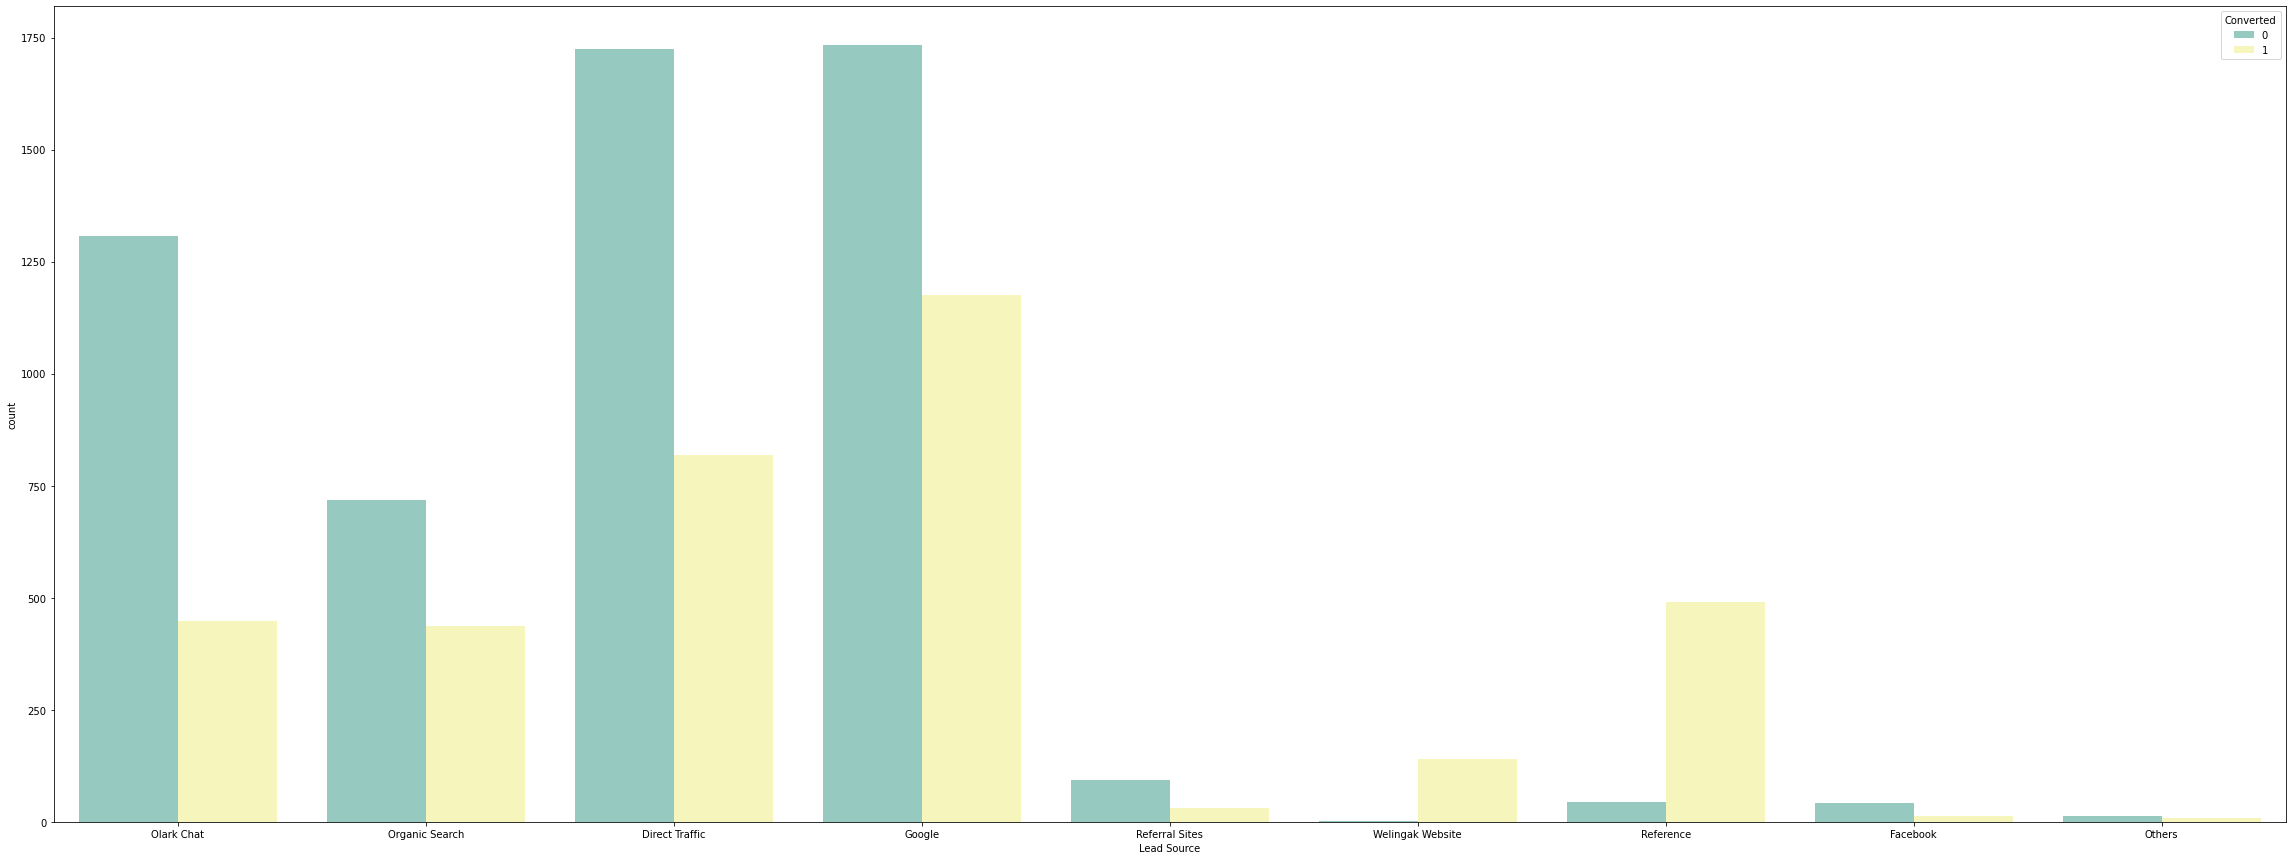

In [22]:
# Visualizing Conversion rate of Lead Source
plt.figure(figsize=(40,15))
sns.countplot(x='Lead Source',hue= 'Converted',data=lead1_score,palette='Set3')




##### Insight
###### Maximum converSion occurs through leads generated from Google,Direct traffic and Olark chat.

### Country

In [23]:
#checking value count of lead source
lead1_score["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

<AxesSubplot:xlabel='Country', ylabel='count'>

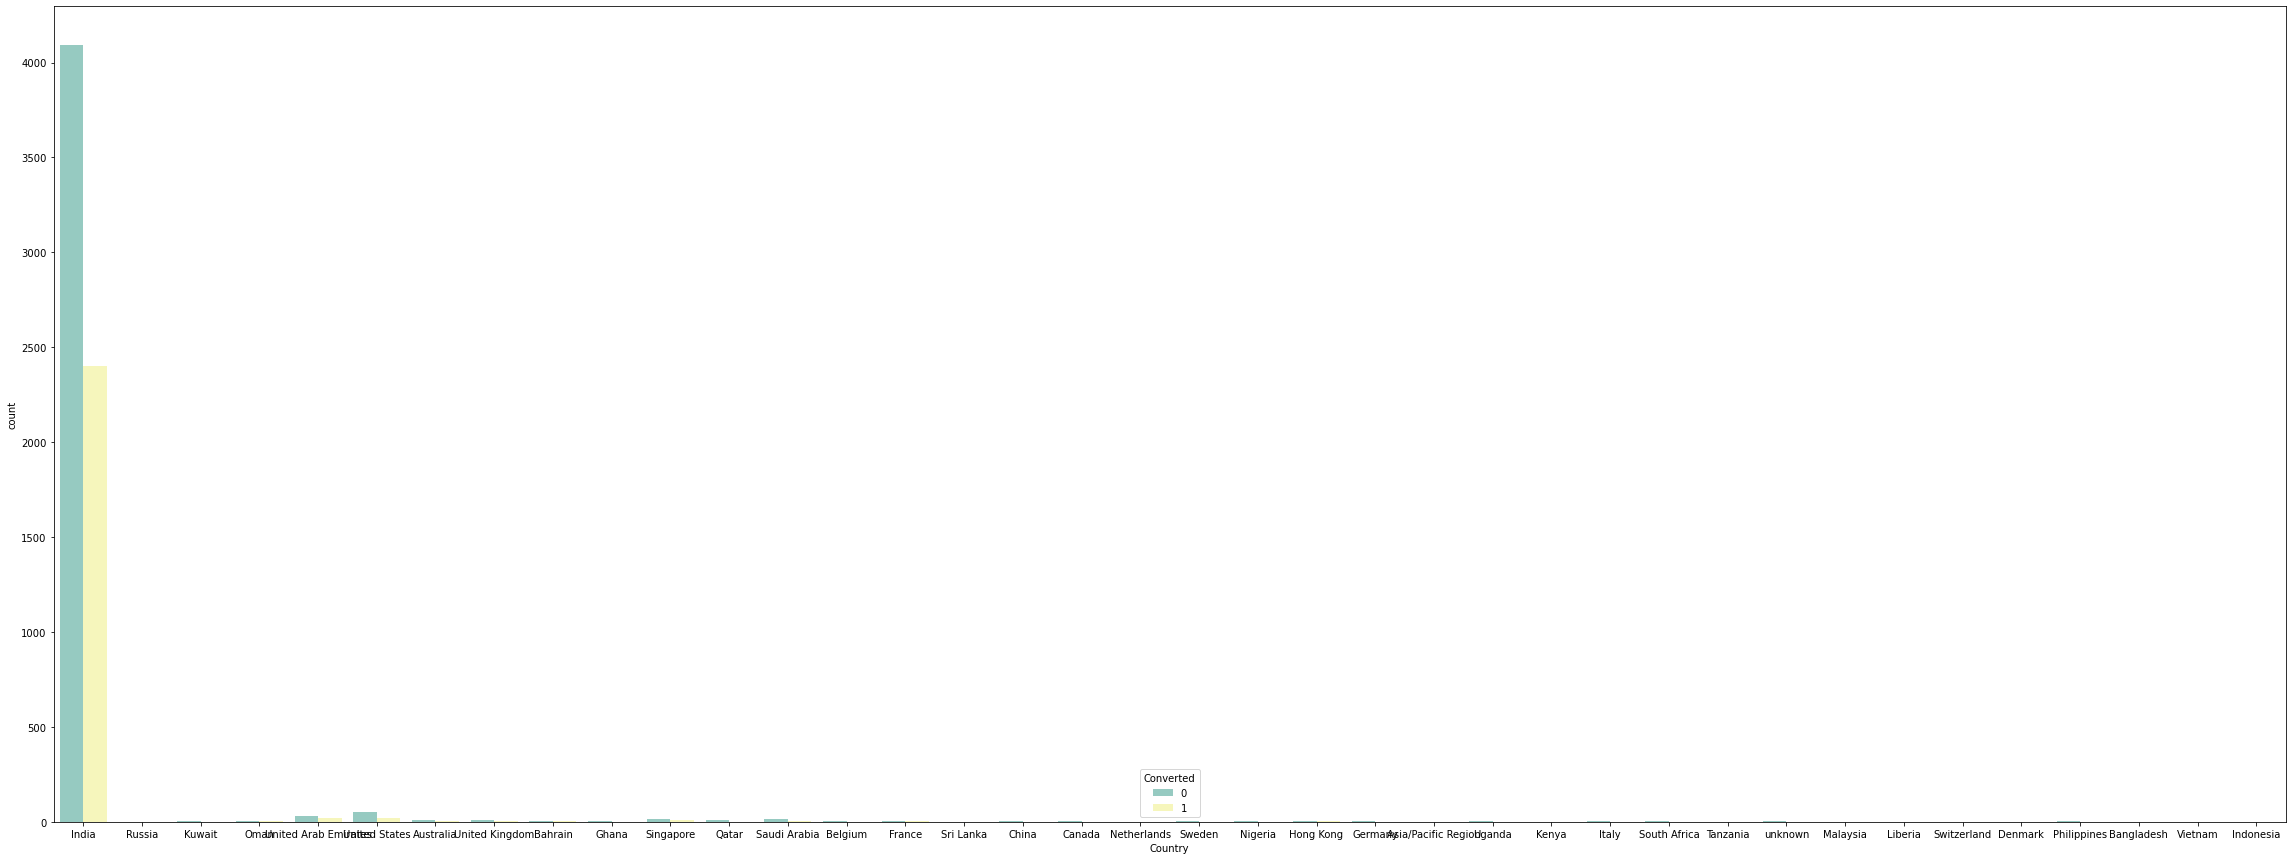

In [24]:
# Visualizing Conversion rate of Country
plt.figure(figsize=(40,15))
sns.countplot(x='Country',hue= 'Converted',data=lead1_score,palette='Set3')



#### Insight
##### Most the data is skewed towards one particular Country not much inference can be optained so better to drop this column.


In [25]:
#Creating a list of columns to be droped
columns_drop=(['Country'])

In [26]:
#checking value count of lead source
lead1_score["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
#We can replace nan to others as some people leave this column as it is because their field is not there in the list.
lead1_score["Specialization"]=lead1_score["Specialization"].replace(np.nan,"Others")

In [28]:
lead1_score["Specialization"].value_counts(dropna=False)

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### What is your current occupation                 

In [29]:
lead1_score["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#We can change NaN to unknown 
lead1_score["What is your current occupation"]=lead1_score["What is your current occupation"].replace(np.nan,"Unknown")

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

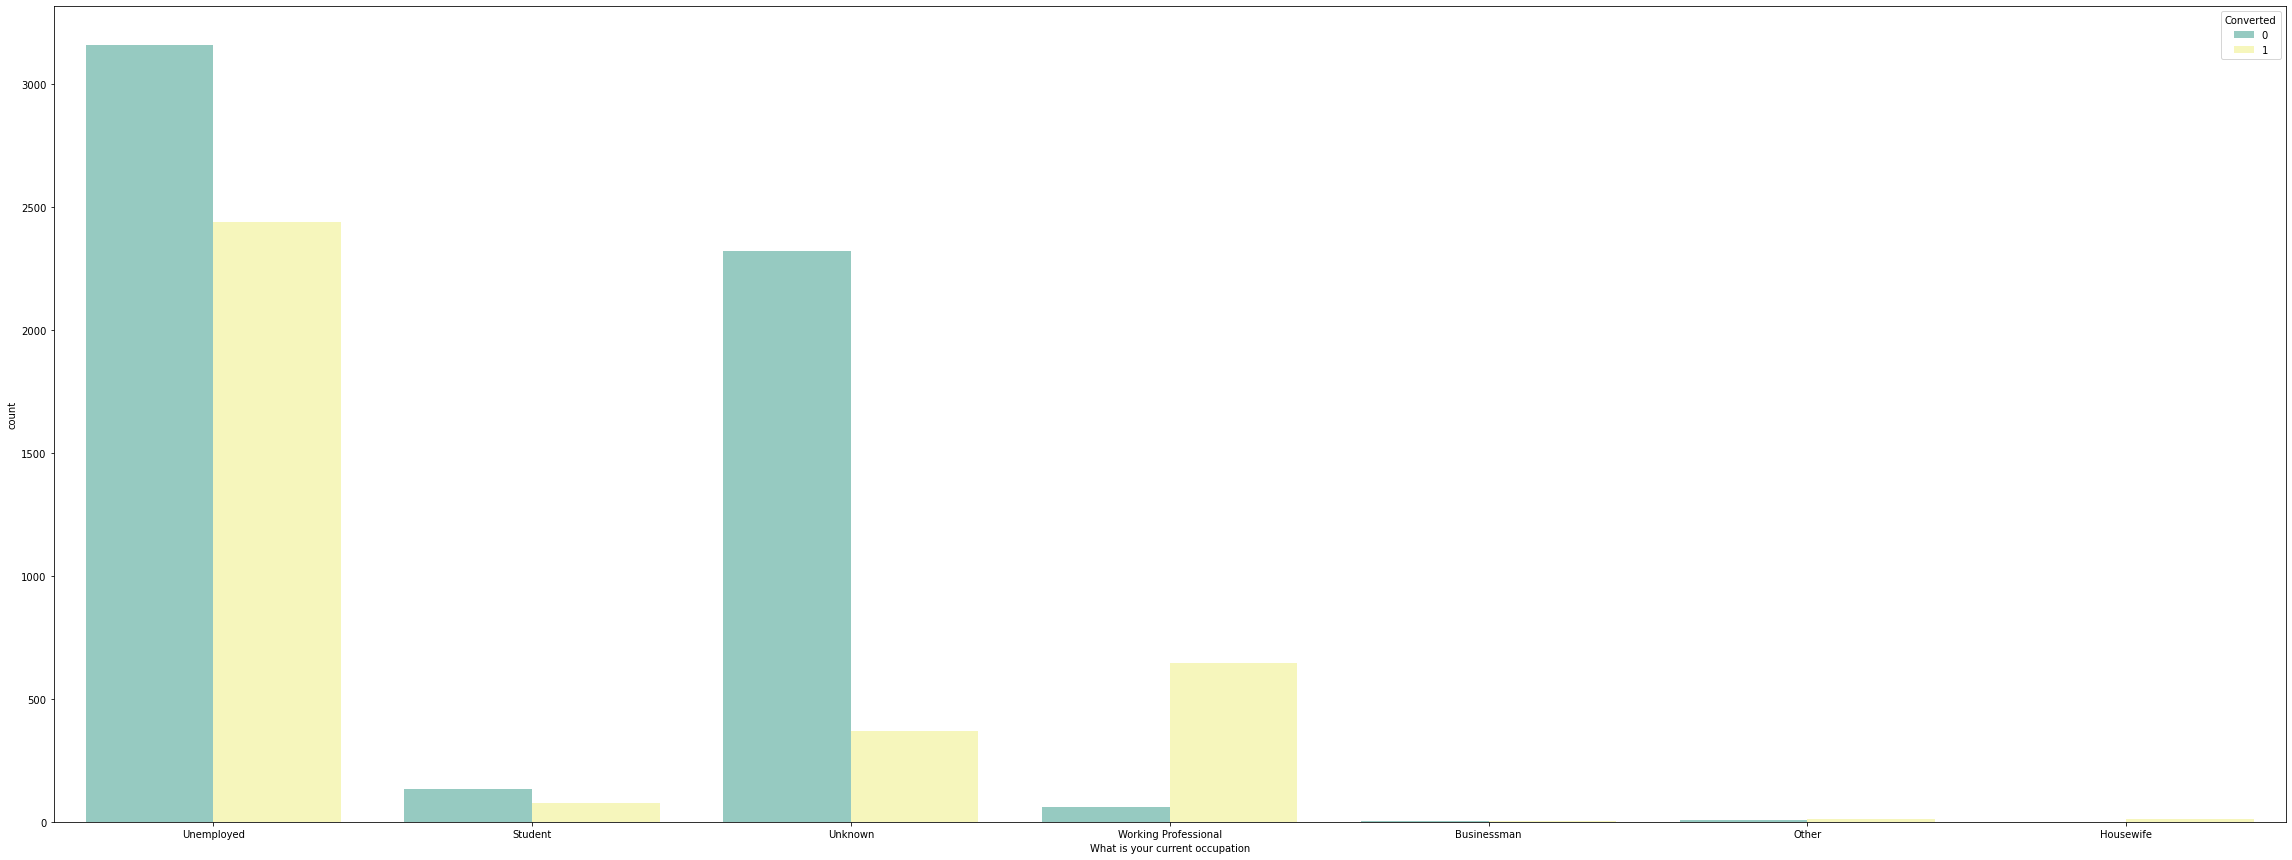

In [31]:
# Visualizing Conversion rate of What is your current occupation
plt.figure(figsize=(40,15))
sns.countplot(x='What is your current occupation',hue= 'Converted',data=lead1_score,palette='Set3')



##### Insight
######  Highest leads are from unemployed and their conversion rate is also high.
######  Highest conversion rate is for working professionals.

### What matters most to you in choosing a course

In [32]:
#checking value count of lead source
lead1_score["What matters most to you in choosing a course"].value_counts(dropna=False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#We can impute Better Career Prospects  for Nan values
lead1_score["What matters most to you in choosing a course"]=lead1_score["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

<AxesSubplot:xlabel='What matters most to you in choosing a course', ylabel='count'>

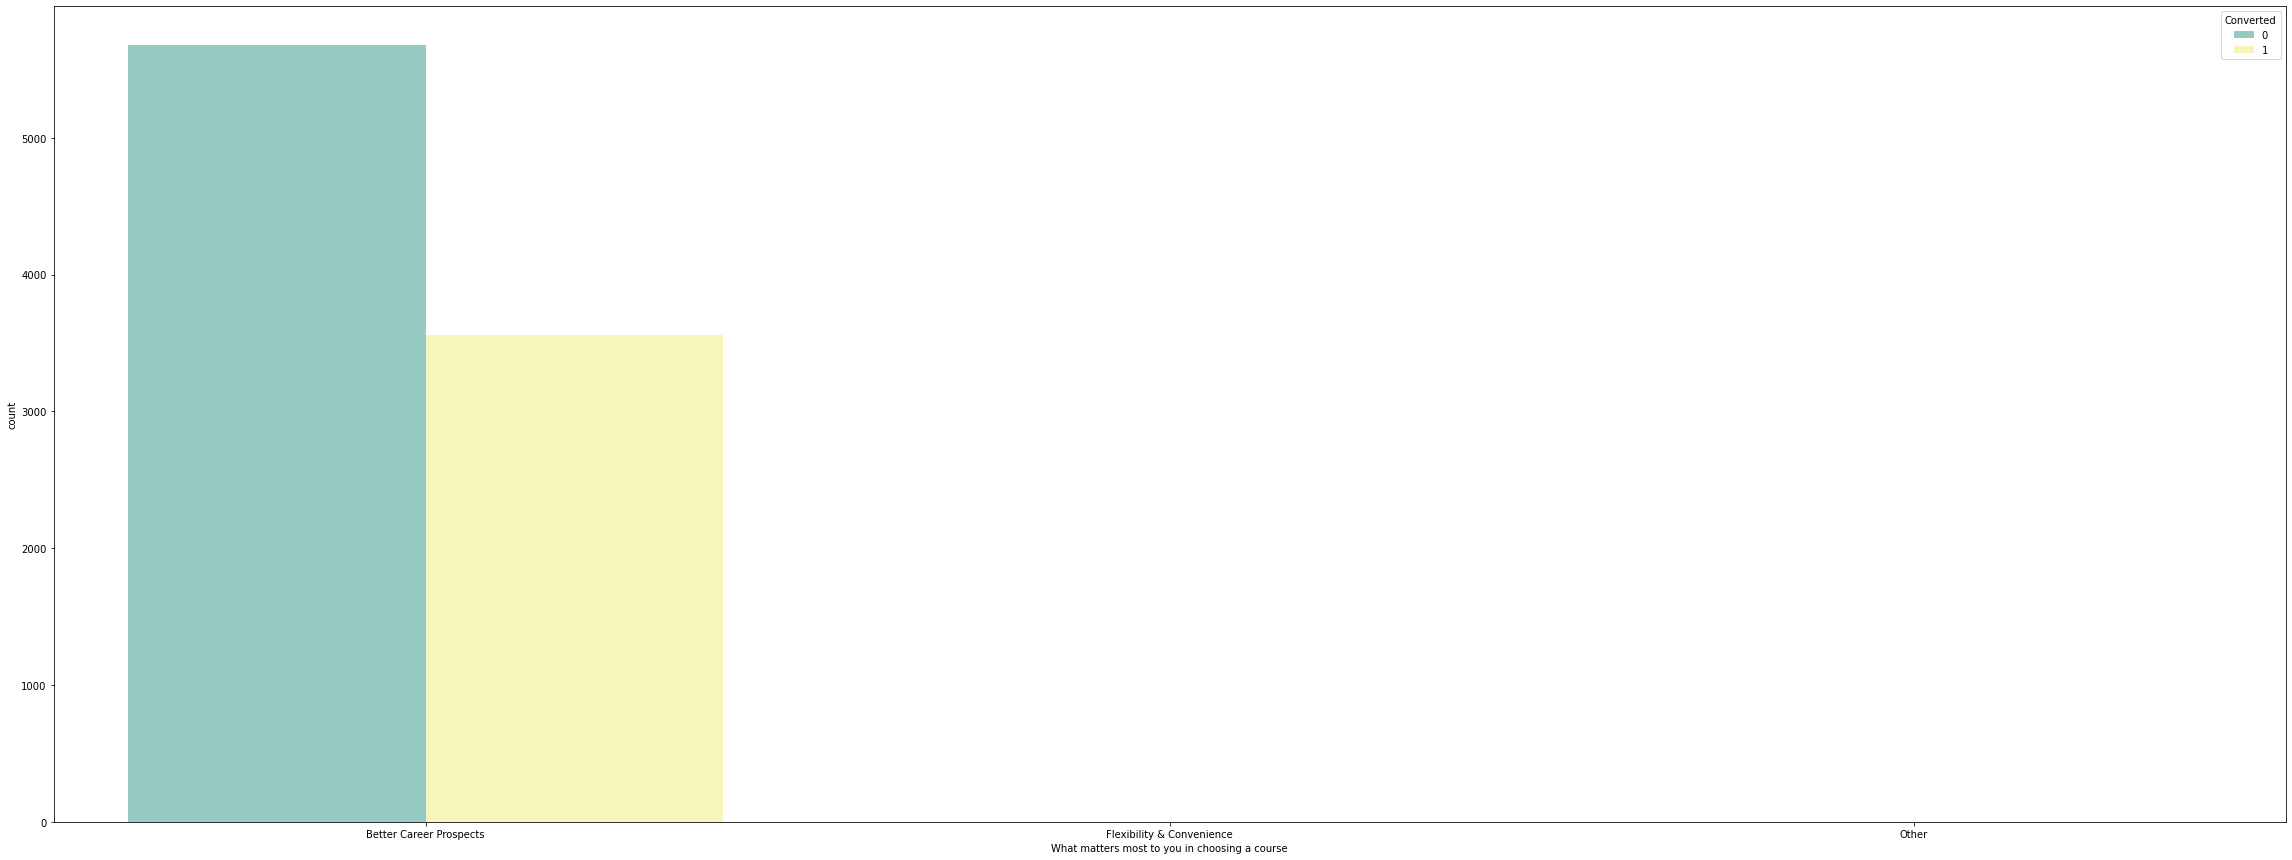

In [34]:
# Visualizing Conversion rate of What is your current occupation
plt.figure(figsize=(40,15))
sns.countplot(x='What matters most to you in choosing a course',hue= 'Converted',data=lead1_score,palette='Set3')

###### We can see data is highly skewed so we can drop this

In [35]:
#We can add What matters most to you in choosing a course to list of columns to be drop

columns_drop.append('What matters most to you in choosing a course')
columns_drop

['Country', 'What matters most to you in choosing a course']

### Tags

In [36]:
#checking value count of Tags
lead1_score["Tags"].value_counts(dropna=False)


NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

<AxesSubplot:xlabel='Tags', ylabel='count'>

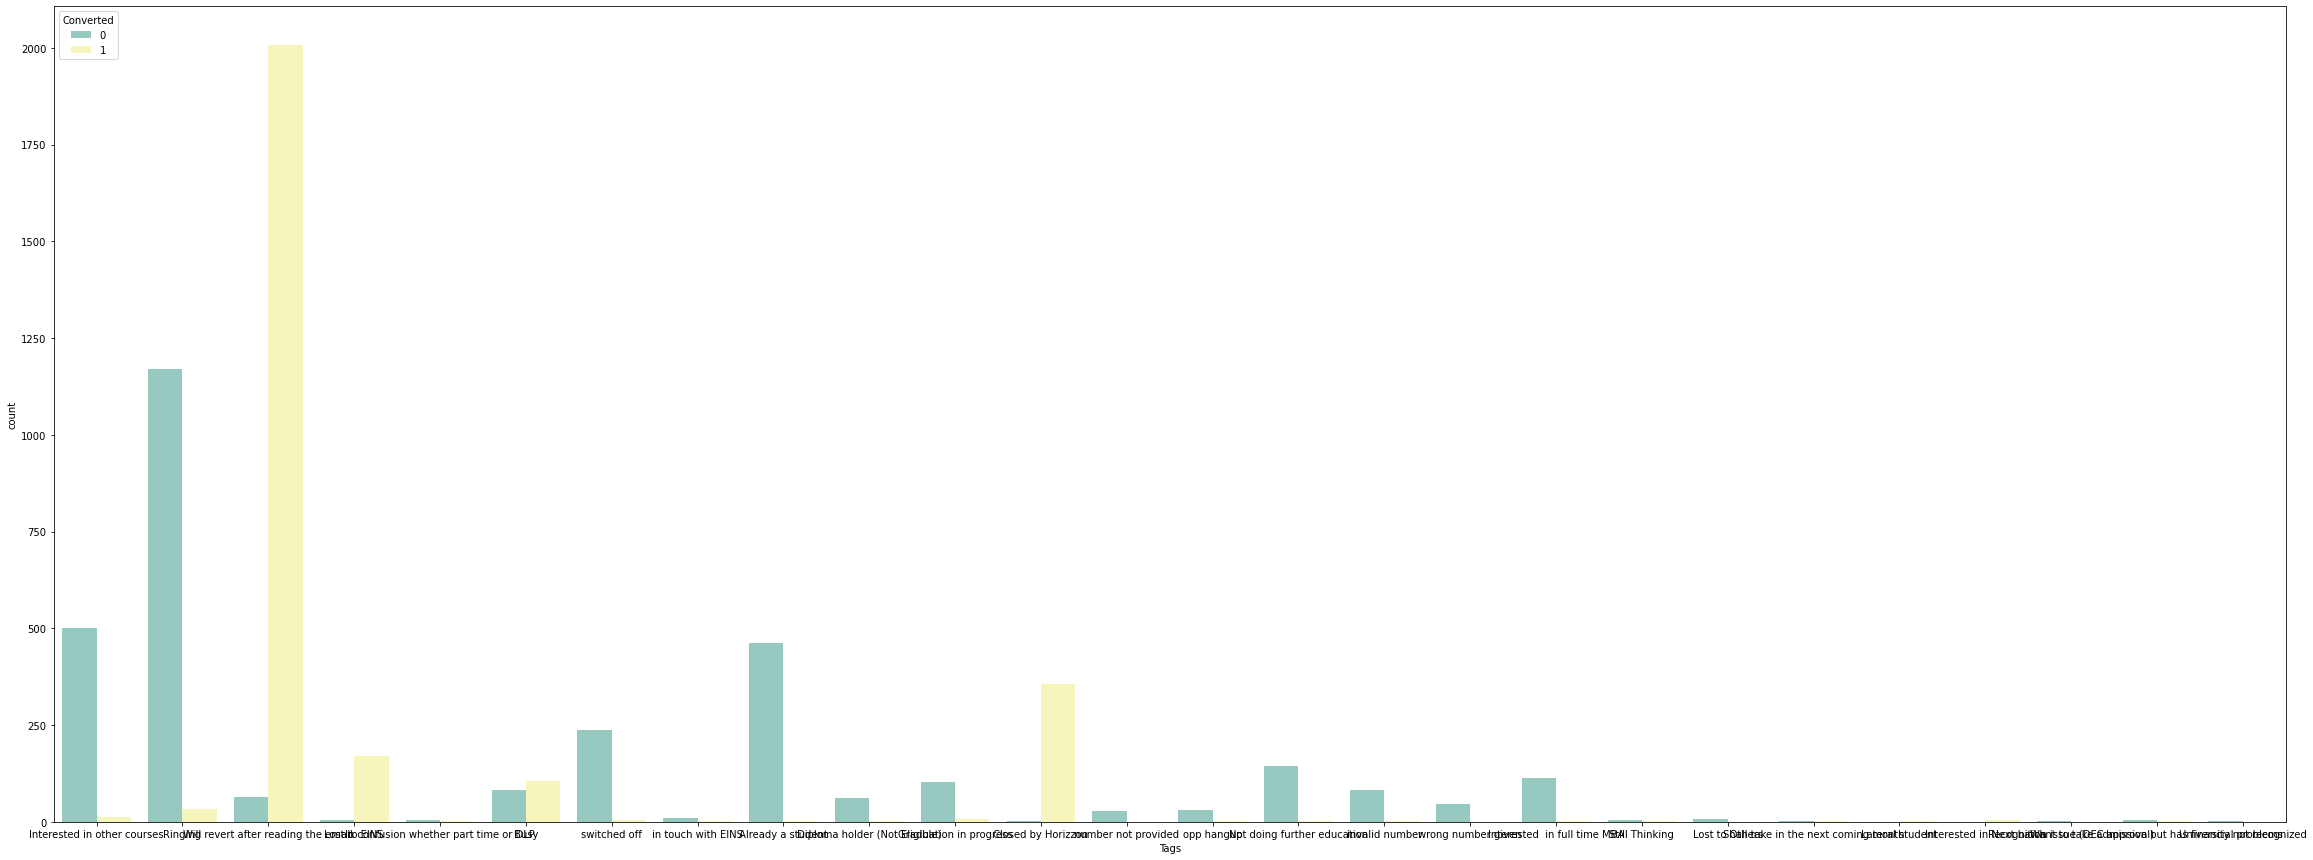

In [37]:
# Visualizing Conversion rate of What is your current occupation
plt.figure(figsize=(40,15))
sns.countplot(x='Tags',hue= 'Converted',data=lead1_score,palette='Set3')

In [38]:
#This column represents the steps taken during initial phase and done by sales so this can be dropped
#We can add Tags to list of columns to be drop

columns_drop.append('Tags')
columns_drop

['Country', 'What matters most to you in choosing a course', 'Tags']

### City

In [39]:
#checking value count of City
lead1_score["City"].value_counts(dropna=False)


NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [40]:
#We can impute missing values with Mumbai
lead1_score["City"]=lead1_score["City"].replace(np.nan,"Mumbai")

In [41]:
#checking value count of City
lead1_score["City"].value_counts(dropna=False)


Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

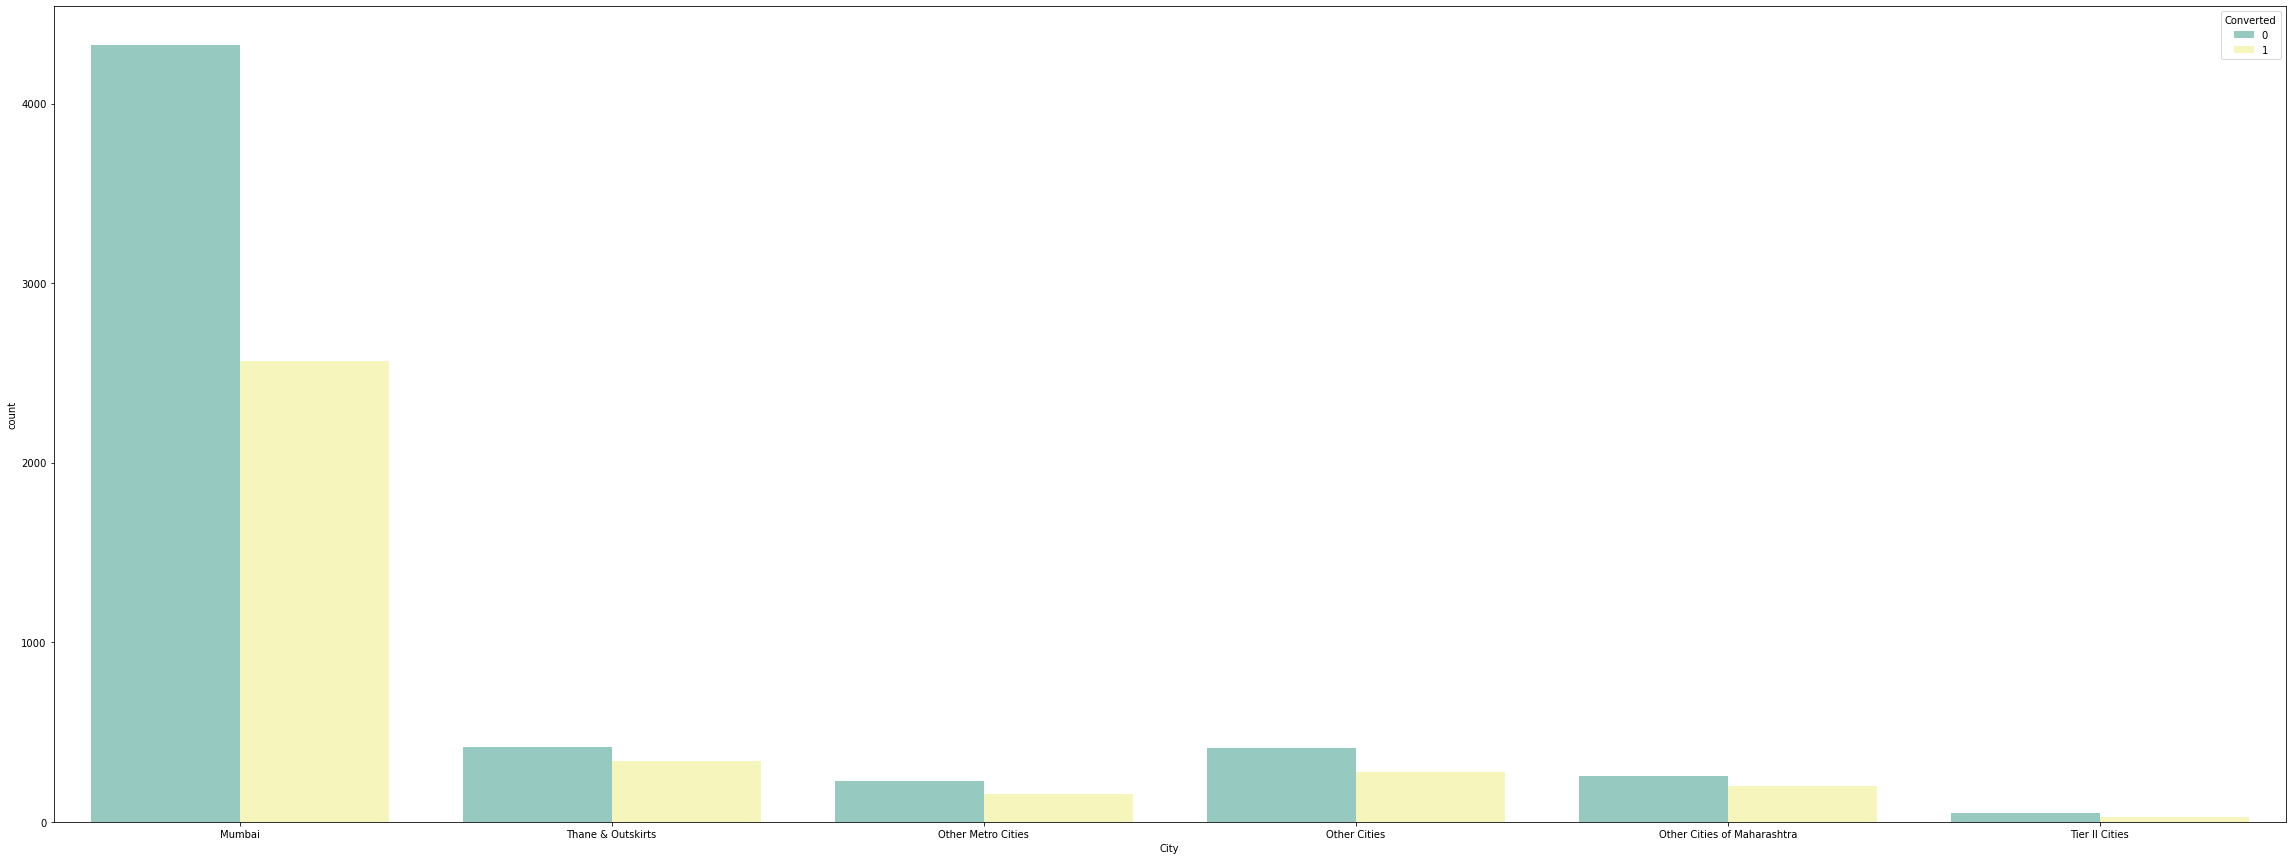

In [42]:
# Visualizing Conversion rate of City
plt.figure(figsize=(40,15))
sns.countplot(x='City',hue= 'Converted',data=lead1_score,palette='Set3')

##### Insights
###### Most leads are from Mumbai and convertion rate is also high.

### Lead Origin

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

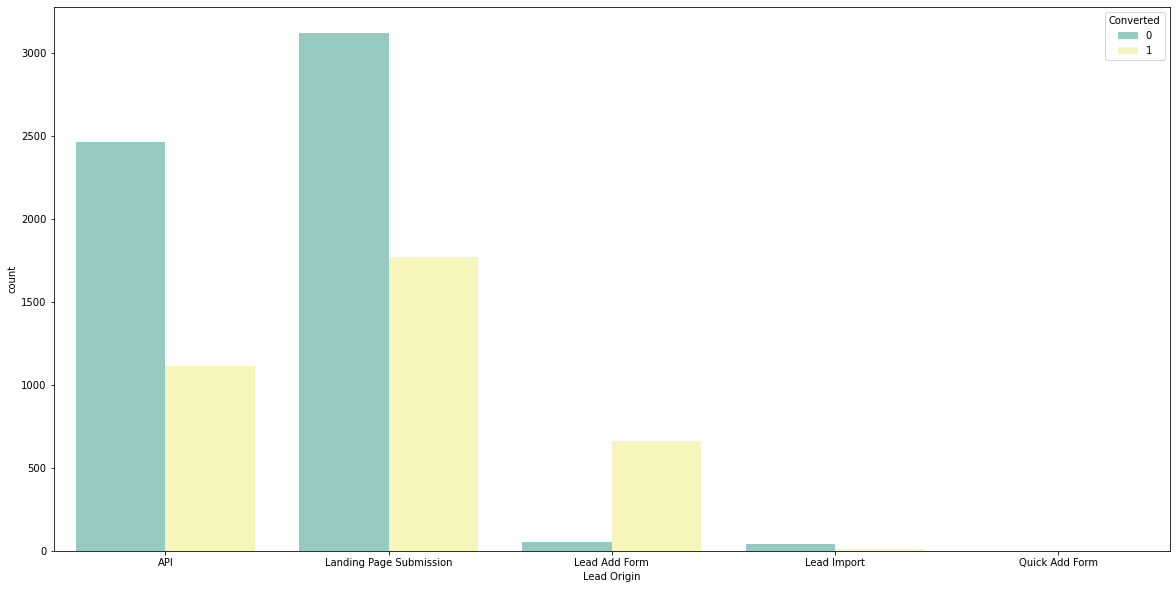

In [43]:
# Visualizing Conversion rate of Lead Origin
plt.figure(figsize=(20,10))
sns.countplot(x='Lead Origin',hue= 'Converted',data=lead1_score,palette='Set3')

#### Insights
##### More leads are generated in landing page submission and Api and their conversion rate is high when compared to others
##### In lead add form conversion rate is high but less number of leads are generated from there.

### Do Not Email

In [44]:
#checking value count of Do Not Email
lead1_score["Do Not Email"].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

### Do Not Call

In [45]:
#checking value count of Do Not Call
lead1_score["Do Not Call"].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

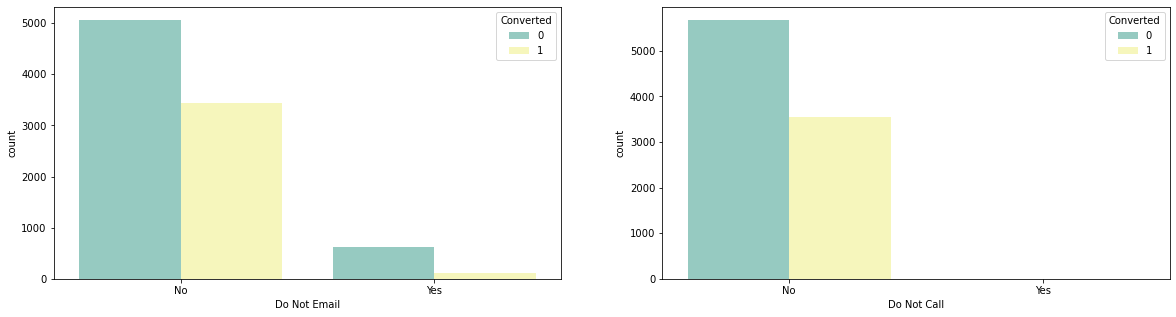

In [46]:
# Visualizing Conversion rate for Do Not Email and Do Not Call
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='Do Not Email',hue= 'Converted',data=lead1_score,ax = axs[0],palette='Set3')
sns.countplot(x='Do Not Call',hue= 'Converted',data=lead1_score,ax = axs[1],palette='Set3')
plt.show()


In [47]:
#  Do Not Call is highly skewed so we can drop 
# Adding   Do Not Call to columns to drop
columns_drop.append( 'Do Not Call')
columns_drop

['Country',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call']

##### Insight
#####  Lead conversion rate is 38%

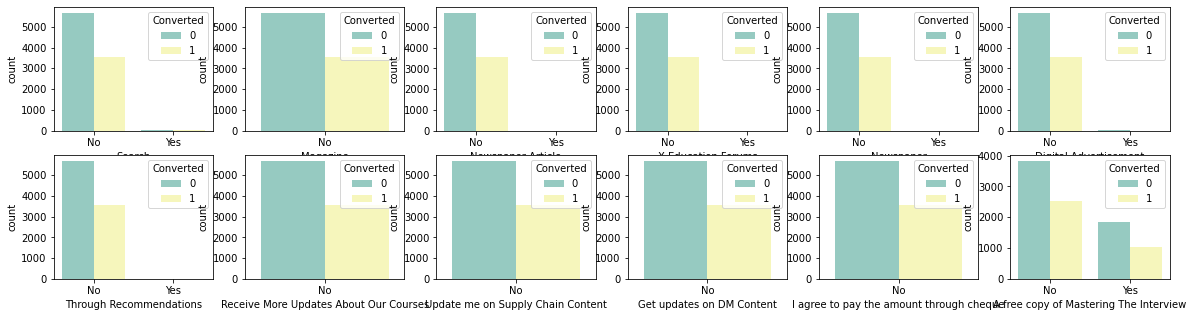

In [48]:
#Checking imbalanced variable
fig,axs=plt.subplots(2,6,figsize=(20,5))
sns.countplot(x='Search',hue= 'Converted',data=lead1_score,ax = axs[0,0],palette='Set3')
sns.countplot(x='Magazine',hue= 'Converted',data=lead1_score,ax = axs[0,1],palette='Set3')
sns.countplot(x='Newspaper Article',hue= 'Converted',data=lead1_score,ax = axs[0,2],palette='Set3')
sns.countplot(x='X Education Forums',hue= 'Converted',data=lead1_score,ax = axs[0,3],palette='Set3')
sns.countplot(x='Newspaper',hue= 'Converted',data=lead1_score,ax = axs[0,4],palette='Set3')
sns.countplot(x='Digital Advertisement',hue= 'Converted',data=lead1_score,ax = axs[0,5],palette='Set3')
sns.countplot(x='Through Recommendations',hue= 'Converted',data=lead1_score,ax = axs[1,0],palette='Set3')
sns.countplot(x='Receive More Updates About Our Courses',hue= 'Converted',data=lead1_score,ax = axs[1,1],palette='Set3')
sns.countplot(x='Update me on Supply Chain Content',hue= 'Converted',data=lead1_score,ax = axs[1,2],palette='Set3')
sns.countplot(x='Get updates on DM Content',hue= 'Converted',data=lead1_score,ax = axs[1,3],palette='Set3')
sns.countplot(x='I agree to pay the amount through cheque',hue= 'Converted',data=lead1_score,ax = axs[1,4],palette='Set3')
sns.countplot(x='A free copy of Mastering The Interview',hue= 'Converted',data=lead1_score,ax = axs[1,5],palette='Set3')
plt.show()


##### Insights
##### In all the variables except A free copy of Mastering The Interview data is highly skewed so no inference can be obtained.
##### Better to drop all those variables having imbalanced data.

In [49]:
columns_drop.append(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
                    ,'A free copy of Mastering The Interview'])
columns_drop

['Country',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call',
 ['Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview']]

### Last Activity

In [50]:
#checking value count of Last Activity
lead1_score["Last Activity"].value_counts(dropna=False)


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [51]:
#We can convert low frequency variable to others
lead1_score["Last Activity"]=lead1_score["Last Activity"].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                                   'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                                   'Resubscribed to emails'],"Others")


<AxesSubplot:xlabel='Last Activity', ylabel='count'>

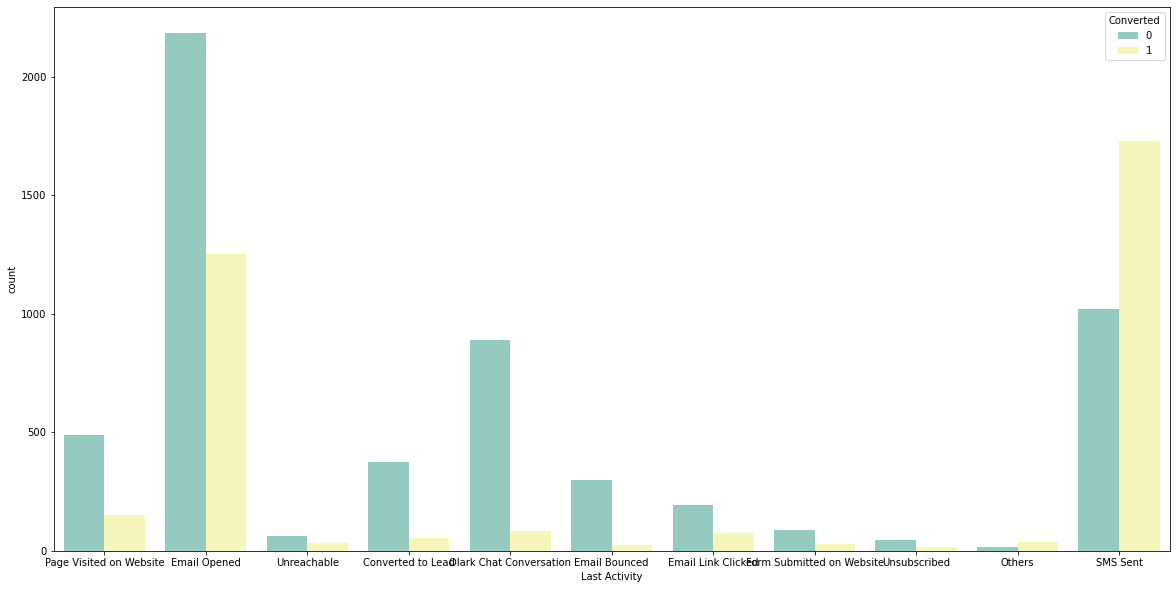

In [52]:
# Visualizing Conversion rate of City
plt.figure(figsize=(20,10))
sns.countplot(x='Last Activity',hue= 'Converted',data=lead1_score,palette='Set3')

##### Insights
#####  Highest leads are from those who have opened the email and conversion rate is also high
#####  Conversion rate of sms sent is the highest.

#### Numerical Variables

In [53]:
#Append Last Activity to columns to drop
columns_drop.append("Last Activity")
columns_drop

['Country',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call',
 ['Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview'],
 'Last Activity']

In [54]:
#Checking value count for Last Notable Activity 
lead1_score["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [55]:
lead1_score['Last Notable Activity'] = lead1_score['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',                                                                    'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

<AxesSubplot:xlabel='Last Notable Activity', ylabel='count'>

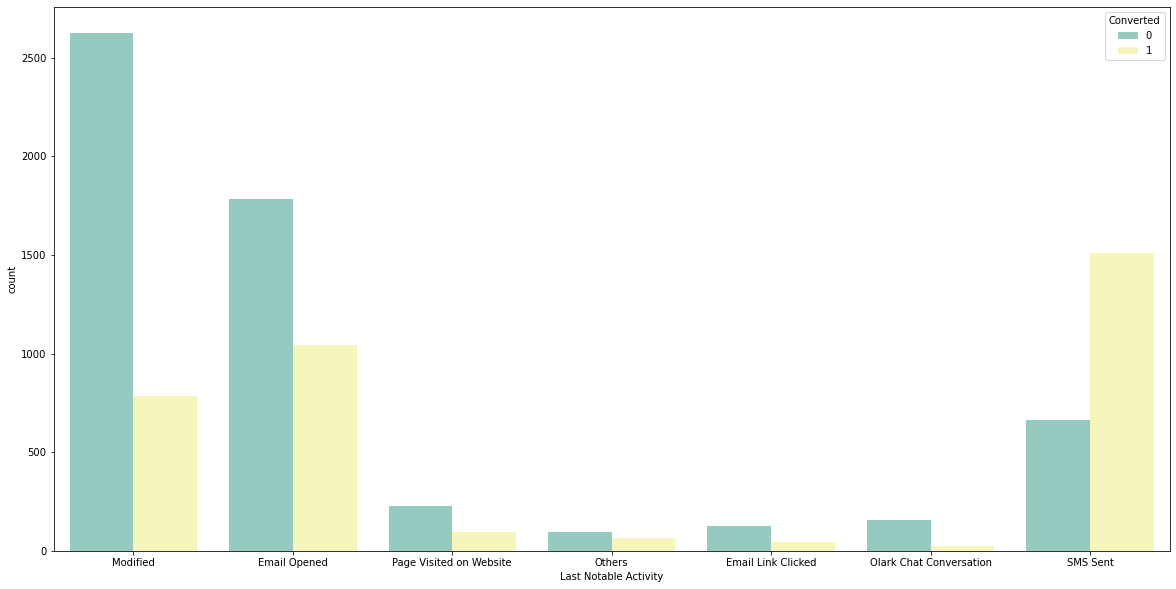

In [56]:
# Visualizing Conversion rate
plt.figure(figsize=(20,10))
sns.countplot(x='Last Notable Activity',hue= 'Converted',data=lead1_score,palette='Set3')

In [57]:
#We can drop this variable as it is handled by sales team.
columns_drop.append("Last Notable Activity")
columns_drop

['Country',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call',
 ['Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview'],
 'Last Activity',
 'Last Notable Activity']

### Converted

In [58]:
#Converted is the target variable
#Lets check the conversion rate
Con=(sum(lead1_score['Converted'])/len(lead1_score['Converted'].index))*100
Con

38.53896103896104

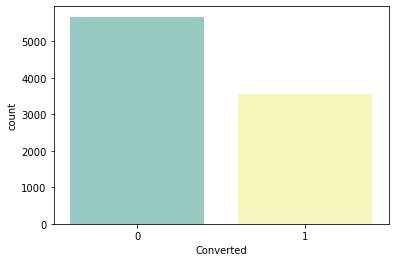

In [59]:
#Visualizing the target variable.
sns.countplot(lead1_score.Converted,palette ="Set3")

plt.show()

### Total Visits


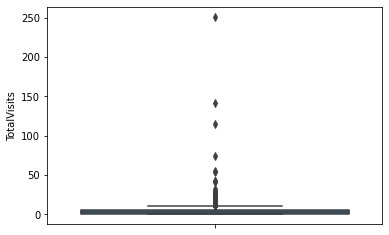

In [60]:
#Visualizing Total Visits
sns.boxplot(y=lead1_score["TotalVisits"])
plt.show()

In [61]:
#Checking percentile
lead1_score['TotalVisits'].describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [62]:
#Presence of outilers and it can be capped to 95%
percentiles=lead1_score['TotalVisits'].quantile([0.05,0.95]).values
lead1_score['TotalVisits'][lead1_score['TotalVisits']<=percentiles[0]]=percentiles[0]
lead1_score['TotalVisits'][lead1_score['TotalVisits']>=percentiles[1]]=percentiles[1]

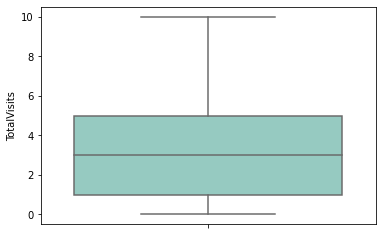

In [193]:
#Visualizing Total Visits
sns.boxplot(y=lead1_score["TotalVisits"],palette ="Set3")
plt.show()

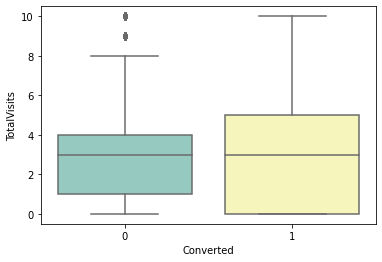

In [64]:
#visualizing conversion rate of totalvisits
sns.boxplot(y="TotalVisits",x="Converted",data=lead1_score,palette='Set3')
plt.show()

##### Insight
###### Median for both converted and non converted is same.No inference can be obtained.

### Total Time Spent On Website

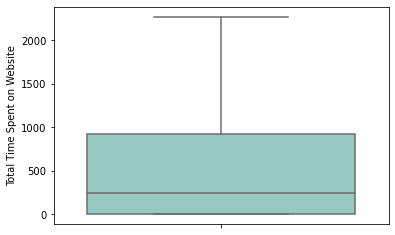

In [194]:
#Visualizing Total Visits
sns.boxplot(y=lead1_score["Total Time Spent on Website"],palette ="Set3")
plt.show()

In [66]:
#Checking percentile
lead1_score['Total Time Spent on Website'].describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])


count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

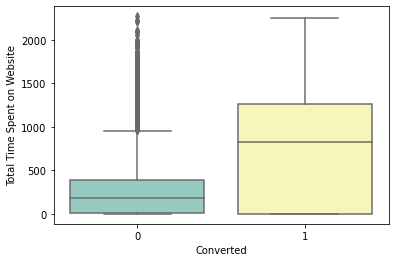

In [67]:
#There are no major outlier
#visualizing conversion rate of Total Time Spent on Website
sns.boxplot(y="Total Time Spent on Website",x="Converted",data=lead1_score,palette='Set3')
plt.show()

##### Insights
##### Conersion rate is high for those who spent more time on website.


### Page views per visit

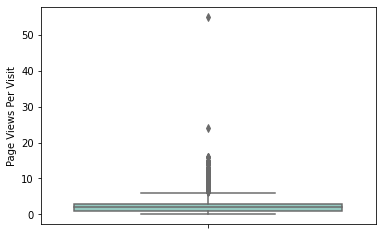

In [68]:
sns.boxplot(y=lead1_score["Page Views Per Visit"],palette="Set3")
plt.show()

In [69]:
#Presence of outliers
#capping it to 95%
percentiles1=lead1_score['Page Views Per Visit'].quantile([0.05,0.95]).values
lead1_score['Page Views Per Visit'][lead1_score['Page Views Per Visit']<=percentiles1[0]]=percentiles1[0]
lead1_score['Page Views Per Visit'][lead1_score['Page Views Per Visit']>=percentiles1[1]]=percentiles1[1]

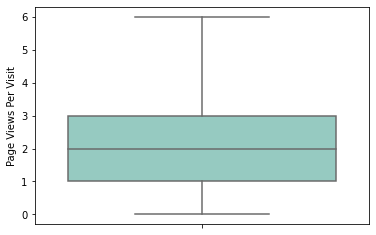

In [70]:
#Visualizing again
sns.boxplot(y=lead1_score["Page Views Per Visit"],palette="Set3")
plt.show()

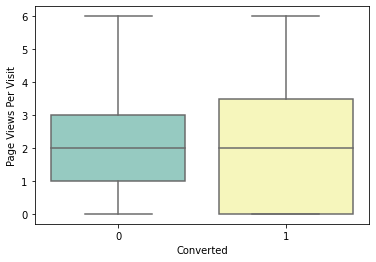

In [71]:
#Checking conversion rate
sns.boxplot(y="Page Views Per Visit",x="Converted",data=lead1_score,palette='Set3')
plt.show()

##### Insight
###### Median for both converted and non converted is same.No inference can be obtained.

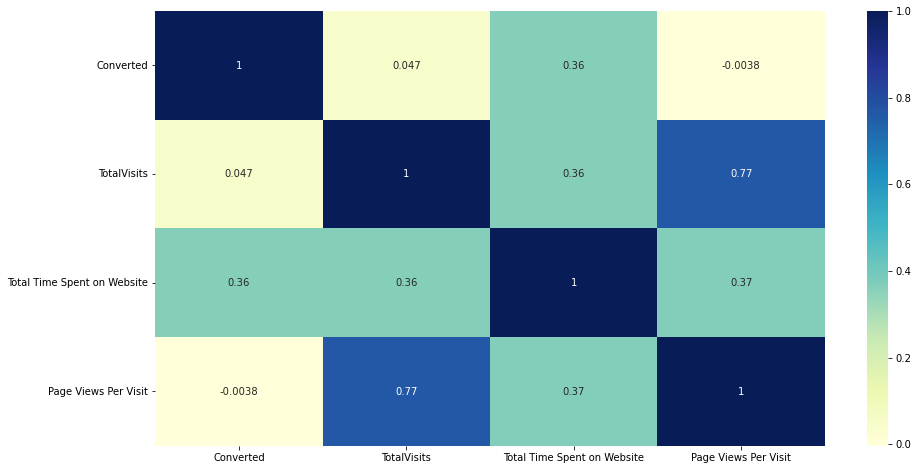

In [72]:
#Checking correlation
plt.figure(figsize=(15,8))
sns.heatmap(lead1_score.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [73]:
#Dropping the columns to drop
#lead1_score = lead1_score.drop(columns_drop,1)
#leads = lead1_score.drop(columns_drop,axis=1, inplace=True)

In [74]:
lead1_score.drop(['Country',
 'What matters most to you in choosing a course',
 'Tags', 'Do Not Call',
 'Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview',
 'Last Activity','Last Notable Activity'],axis=1, inplace=True)

In [75]:
#Percentage of null values
round(100*(lead1_score.isnull().sum())/len(lead1_score.index),2)

Lead Origin                        0.00
Lead Source                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        1.48
Total Time Spent on Website        0.00
Page Views Per Visit               1.48
Specialization                     0.00
What is your current occupation    0.00
City                               0.00
dtype: float64

In [76]:
#Missing value is less than 2% we can drop those rows
lead1_score=lead1_score.dropna()

In [77]:
round(100*(lead1_score.isnull().sum())/len(lead1_score.index),2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Specialization                     0.0
What is your current occupation    0.0
City                               0.0
dtype: float64

In [78]:
lead1_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   Specialization                   9103 non-null   object 
 8   What is your current occupation  9103 non-null   object 
 9   City                             9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


In [79]:
lead1_score.shape

(9103, 10)

In [80]:
lead1_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai


### Data Preparation

In [81]:
### Converting binary variables(yes/no) to 0/1
var =  ['Do Not Email']
def b_map(x):
    return x.map({'Yes': 1, "No": 0})
lead1_score[var] = lead1_score[var].apply(b_map)

In [82]:
#creating list of categorical variables for creating dummy variables
cat_columns= lead1_score.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [83]:
#Creating dummy variables for categorical data and dropping the 1st one
dummyv_data = pd.get_dummies(lead1_score[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation', 'City']], drop_first=True)
dummyv_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
#Dropping the columns which dummies were created
lead1_score=lead1_score.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation', 'City'],axis=1)

In [85]:
lead1_score

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.00
1,0,0,5.0,674,2.50
2,0,1,2.0,1532,2.00
3,0,0,1.0,305,1.00
4,0,1,2.0,1428,1.00
...,...,...,...,...,...
9235,1,1,8.0,1845,2.67
9236,0,0,2.0,238,2.00
9237,1,0,2.0,199,2.00
9238,0,1,3.0,499,3.00


In [86]:
#Concatinating dummy variables to dataframe
lead1_score = pd.concat([lead1_score, dummyv_data], axis = 1)

In [87]:
lead1_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Test - Train Split


In [88]:
from sklearn.model_selection import train_test_split


In [89]:
# Putting feature variable to X
X = lead1_score.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
# Putting response variable to y
y = lead1_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
# Getting numerical Columns
numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

numerical_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [94]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [95]:
#Checking the conversion rate
Con=(sum(lead1_score['Converted'])/len(lead1_score['Converted'].index))*100
Con

38.02043282434362

###### We have 38% conversion rate.

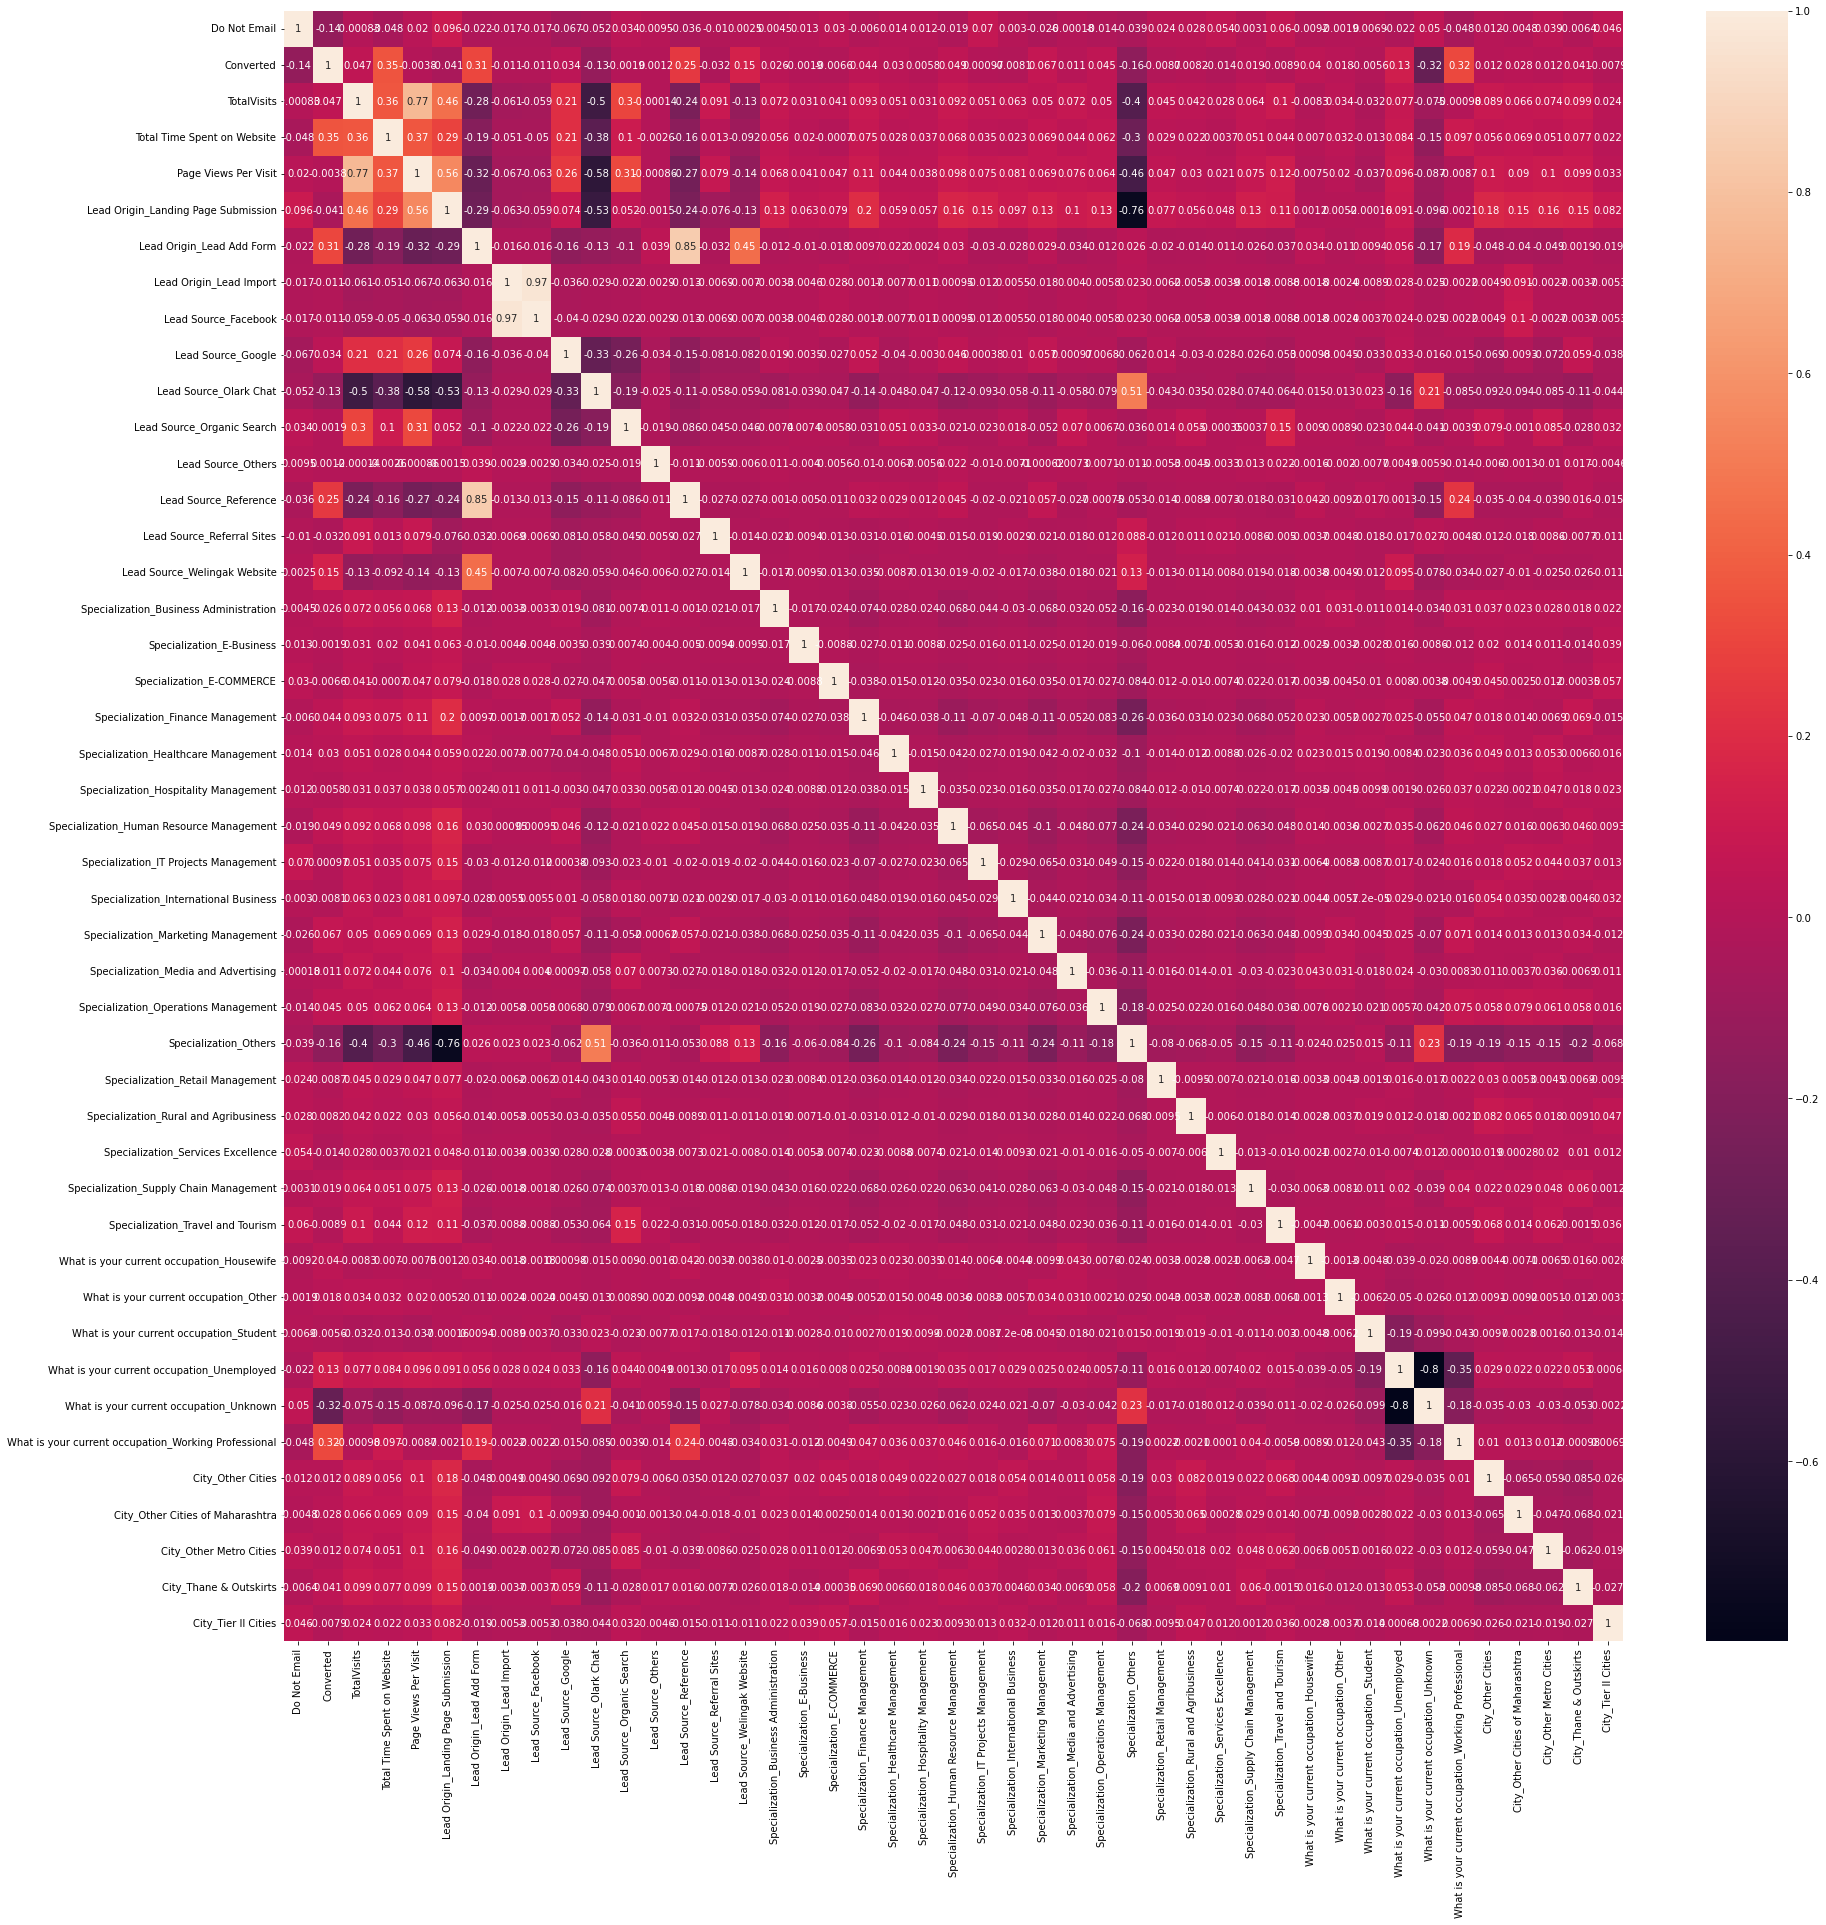

In [96]:
 #Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(lead1_score.corr(),annot = True)
plt.show()

In [97]:
#Dropping highly correlated variables
X_test = X_test.drop(['Specialization_Others','Lead Source_Olark Chat','What is your current occupation_Unknown'], 1)
X_train = X_train.drop(['Specialization_Others','Lead Source_Olark Chat','What is your current occupation_Unknown'], 1)

###### Checking the Correlation Matrix
###### After dropping highly correlated variables now let's check the correlation matrix again.

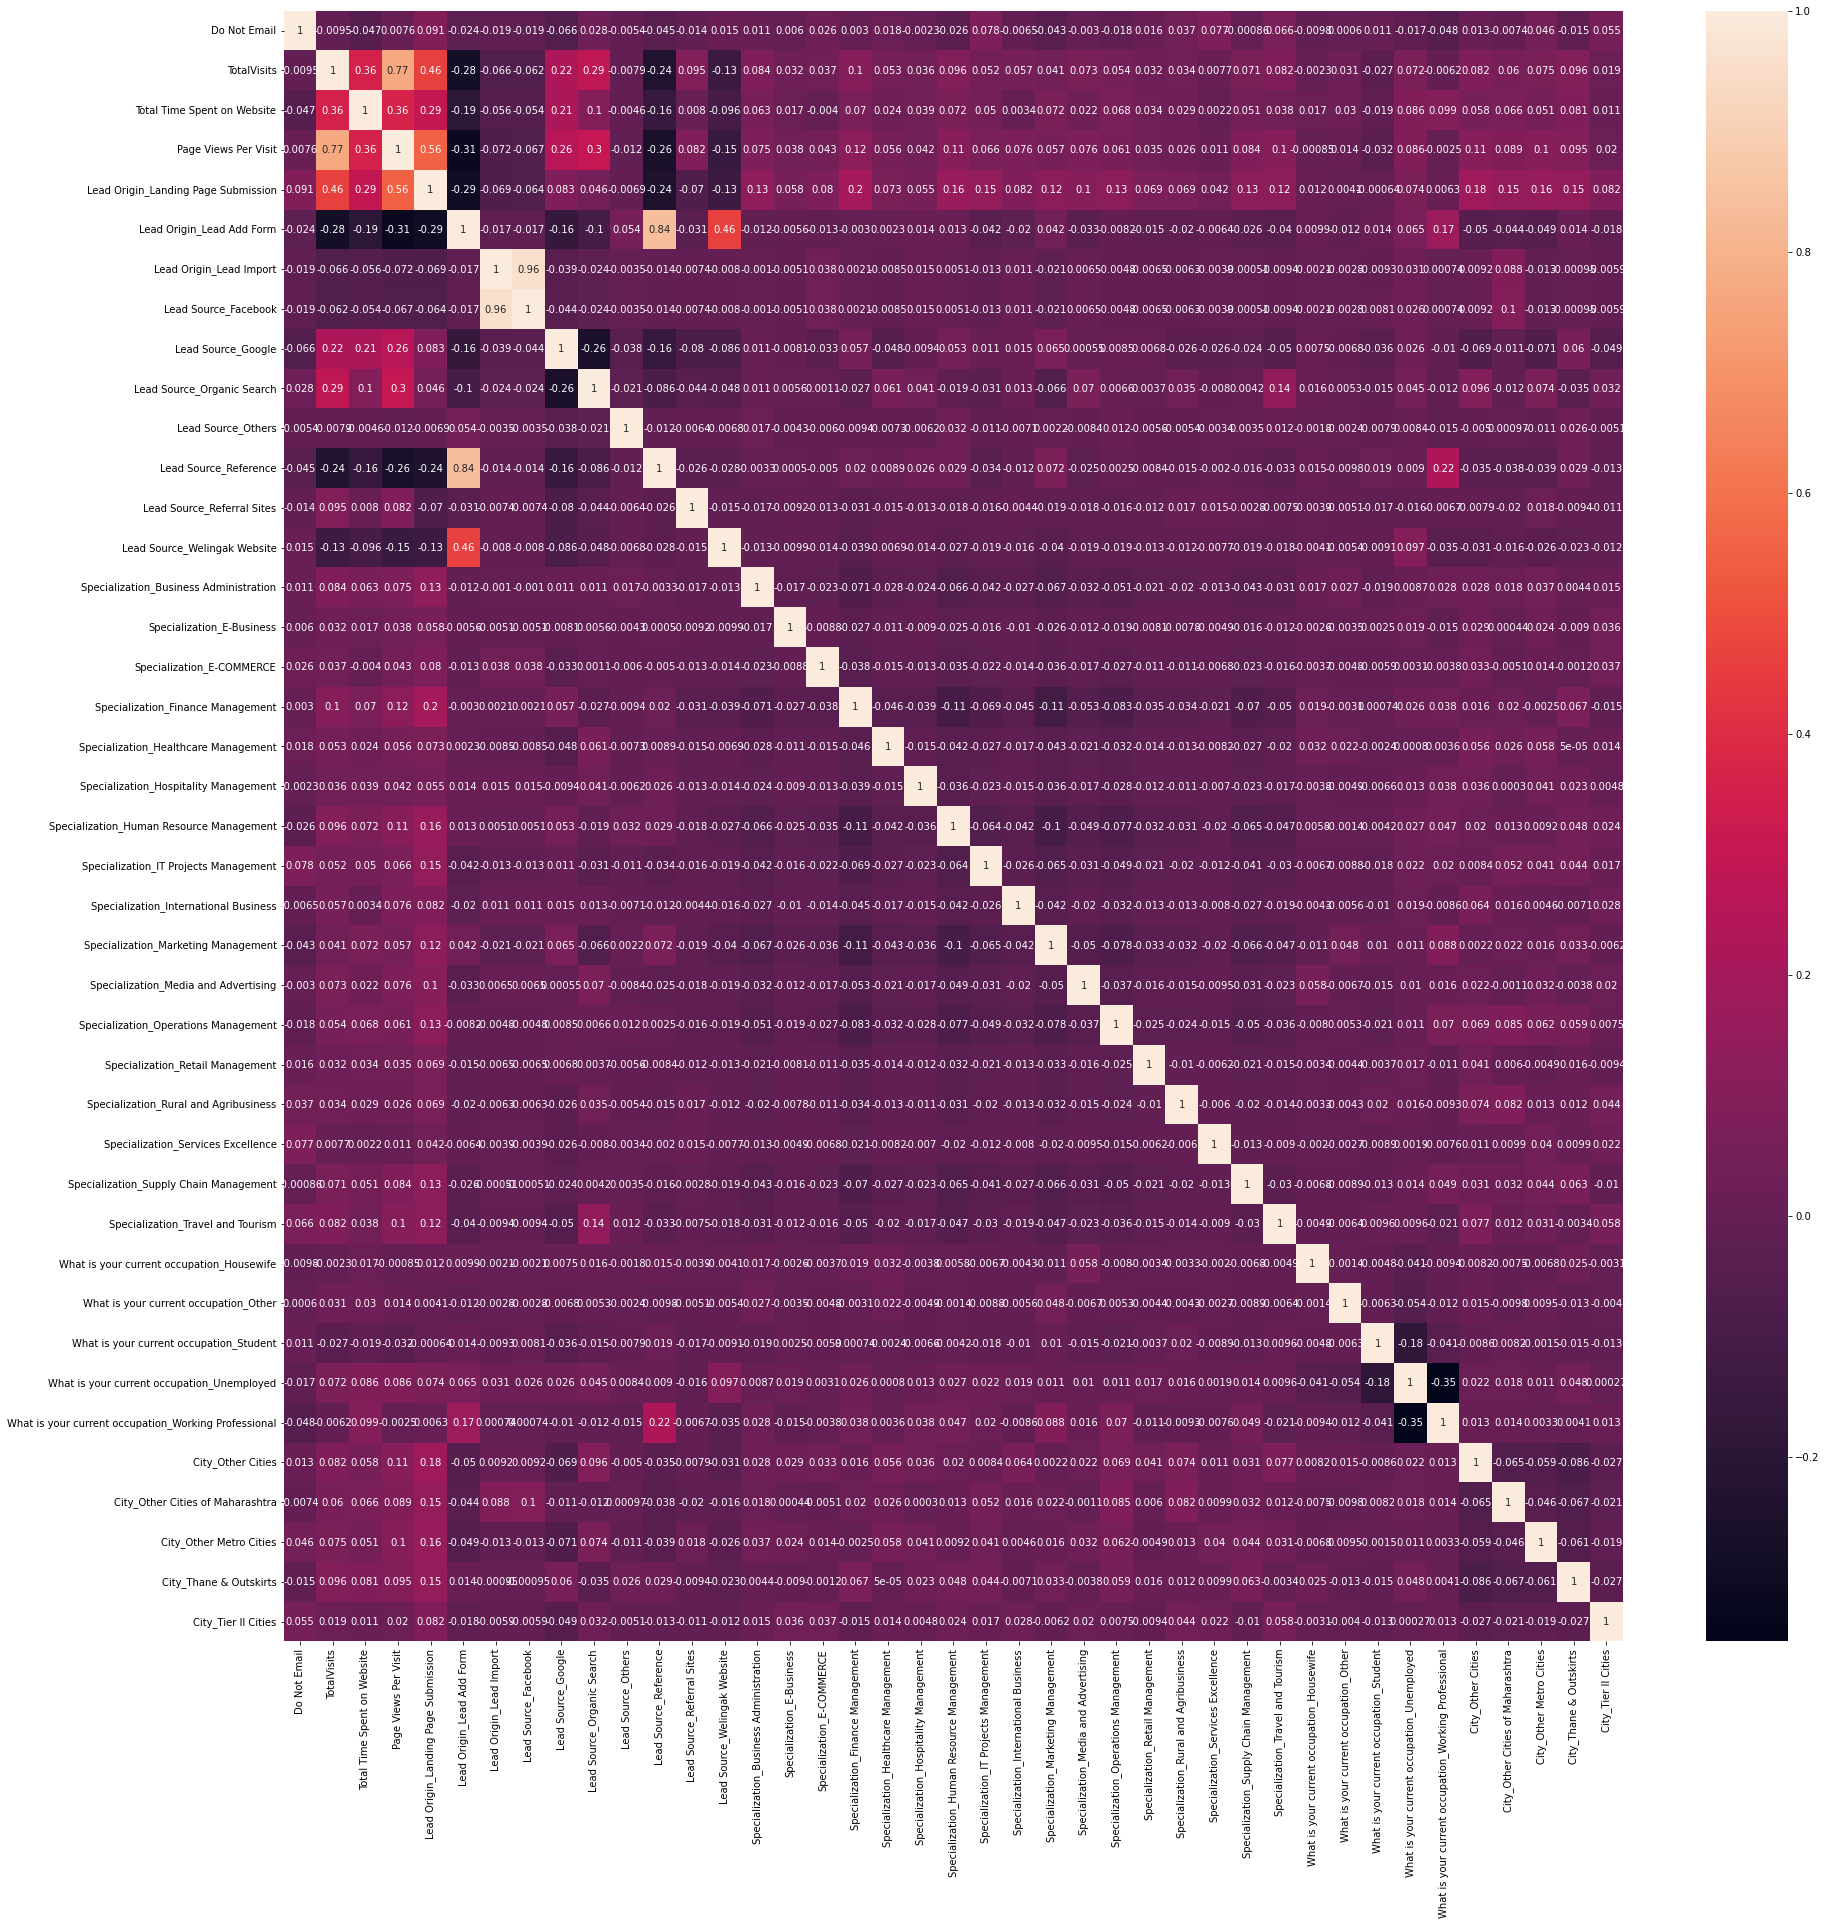

In [98]:
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building
###### Let's start by splitting our data into a training set and a test set.

#### Model 1

In [99]:
import statsmodels.api as sm

In [100]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.0
Date:                Tue, 18 Oct 2022   Deviance:                       5722.0
Time:                        13:19:15   Pearson chi2:                 6.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6987      0.099    -17.201      0.000      -1.892      -1.505
Do Not Email                                            -0.3672      0.043     -8.519      0.000      -0.452      -0.283
TotalVisits                                              0.2423      0.049      4.931      0.000       0.146       0.339
Total Time Spent on Website                              1.0041      0.037     27.218      0.000       0.932       1.076
Page Views Per Visit                                    -0.2277      0.056     -4.059      0.000      -0.338      -0.118
Lead Origin_Landing Page Submission                     -0.7345      0.108     -6.782      0.000      -0.947      -0.522
Lead Origin_Lead Add Form                                4.0410      0.783      5.164      0.000       2.507       5.575
Lead Origin_Lead Import                                  0.0736      1.723      0.043      0.966      -3.303       3.450
Lead Source_Facebook                                     0.2014      1.723      0.117      0.907      -3.176       3.578
Lead Source_Google                                      -0.0915      0.082     -1.121      0.262      -0.252       0.069
Lead Source_Organic Search                              -0.1818      0.115     -1.585      0.113      -0.407       0.043
Lead Source_Others                                      -0.6319      0.737     -0.858      0.391      -2.076       0.812
Lead Source_Reference                                   -0.9864      0.812     -1.215      0.225      -2.578       0.605
Lead Source_Referral Sites                              -0.8271      0.329     -2.516      0.012      -1.471      -0.183
Lead Source_Welingak Website                             1.2733      1.059      1.202      0.229      -0.803       3.349
Specialization_Business Administration                   0.4489      0.187      2.405      0.016       0.083       0.815
Specialization_E-Business                                0.9331      0.395      2.364      0.018       0.160       1.707
Specialization_E-COMMERCE                                0.3293      0.323      1.019      0.308      -0.304       0.963
Specialization_Finance Management                        0.4619      0.136      3.388      0.001       0.195       0.729
Specialization_Healthcare Management                     0.4428      0.261      1.694      0.090      -0.070       0.955
Specialization_Hospitality Management                   -0.2663      0.318     -0.837      0.402      -0.890       0.357
Specialization_Human Resource Management                 0.4231      0.140      3.020      0.003       0.148       0.698
Specialization_IT Projects Management                    0

#### Feature Selection Using RFE

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [102]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [103]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True])

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 6),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_Finance Management', False, 7),
 ('Specialization_Healthcare Management', False, 5),
 ('Specialization_Hospitality Management', False, 15),
 ('Specialization_Human Resource Management', False, 8),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_International Business',

In [105]:
col = X_train.columns[rfe.support_]

In [106]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

##### Assessing the model with StatsModels

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.1
Date:                Tue, 18 Oct 2022   Deviance:                       5784.2
Time:                        13:19:16   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6624      0.080    -20.663      0.000      -1.820      -1.505
Do Not Email                                            -0.3639      0.042     -8.578      0.000      -0.447      -0.281
Total Time Spent on Website                              0.9997      0.035     28.590      0.000       0.931       1.068
Lead Origin_Landing Page Submission                     -0.4426      0.072     -6.141      0.000      -0.584      -0.301
Lead Origin_Lead Add Form                                3.2728      0.220     14.880      0.000       2.842       3.704
Lead Source_Referral Sites                              -0.7838      0.320     -2.451      0.014      -1.411      -0.157
Lead Source_Welingak Website                             2.0200      0.749      2.695      0.007       0.551       3.489
Specialization_E-Business                                0.5809      0.383      1.516      0.129      -0.170       1.332
Specialization_Marketing Management                      0.2197      0.111      1.973      0.048       0.002       0.438
Specialization_Services Excellence                       0.7988      0.543      1.472      0.141      -0.265       1.863
What is your current occupation_Housewife               23.8392    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.1423      0.647      1.765      0.078      -0.126       2.411
What is your current occupation_Student                  1.1494      0.225      5.113      0.000       0.709       1.590
What is your current occupation_Unemployed               1.2410      0.083     15.021      0.000       1.079       1.403
What is your current occupation_Working Professional     3.7362      0.188     19.822      0.000       3.367       4.106
City_Tier II Cities                                     -0.4468      0.397     -1.126      0.260      -1.225       0.331
========================================================================================================================
"""

##### P value for What is your current occupation_Housewife is high so we can drop that


In [108]:
col = col.drop('What is your current occupation_Housewife',1)

##### Model 2

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.6
Date:                Tue, 18 Oct 2022   Deviance:                       5803.2
Time:                        13:19:16   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6424      0.080    -20.568      0.000      -1.799      -1.486
Do Not Email                                            -0.3655      0.042     -8.618      0.000      -0.449      -0.282
Total Time Spent on Website                              1.0000      0.035     28.652      0.000       0.932       1.068
Lead Origin_Landing Page Submission                     -0.4339      0.072     -6.033      0.000      -0.575      -0.293
Lead Origin_Lead Add Form                                3.2923      0.220     14.969      0.000       2.861       3.723
Lead Source_Referral Sites                              -0.7866      0.319     -2.462      0.014      -1.413      -0.160
Lead Source_Welingak Website                             2.0074      0.749      2.678      0.007       0.538       3.476
Specialization_E-Business                                0.5721      0.383      1.493      0.135      -0.179       1.323
Specialization_Marketing Management                      0.2131      0.111      1.916      0.055      -0.005       0.431
Specialization_Services Excellence                       0.7923      0.542      1.461      0.144      -0.270       1.855
What is your current occupation_Other                    1.1195      0.647      1.730      0.084      -0.149       2.388
What is your current occupation_Student                  1.1243      0.225      5.005      0.000       0.684       1.565
What is your current occupation_Unemployed               1.2159      0.082     14.834      0.000       1.055       1.377
What is your current occupation_Working Professional     3.7109      0.188     19.716      0.000       3.342       4.080
City_Tier II Cities                                     -0.4532      0.397     -1.142      0.253      -1.231       0.324
========================================================================================================================
"""

In [110]:
##### P value for Specialization_E-Business,Specialization_Services Excellence,City_Tier II Cities are high so we can drop 
col = col.drop('Specialization_E-Business',1)

##### Model 3

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.7
Date:                Tue, 18 Oct 2022   Deviance:                       5805.4
Time:                        13:19:16   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6412      0.080    -20.564      0.000      -1.798      -1.485
Do Not Email                                            -0.3656      0.042     -8.619      0.000      -0.449      -0.282
Total Time Spent on Website                              0.9994      0.035     28.648      0.000       0.931       1.068
Lead Origin_Landing Page Submission                     -0.4270      0.072     -5.954      0.000      -0.568      -0.286
Lead Origin_Lead Add Form                                3.2954      0.220     14.987      0.000       2.864       3.726
Lead Source_Referral Sites                              -0.7881      0.319     -2.467      0.014      -1.414      -0.162
Lead Source_Welingak Website                             2.0034      0.749      2.673      0.008       0.534       3.472
Specialization_Marketing Management                      0.2073      0.111      1.865      0.062      -0.011       0.425
Specialization_Services Excellence                       0.7848      0.542      1.448      0.148      -0.277       1.847
What is your current occupation_Other                    1.1169      0.647      1.727      0.084      -0.151       2.384
What is your current occupation_Student                  1.1258      0.224      5.017      0.000       0.686       1.566
What is your current occupation_Unemployed               1.2151      0.082     14.832      0.000       1.055       1.376
What is your current occupation_Working Professional     3.7056      0.188     19.696      0.000       3.337       4.074
City_Tier II Cities                                     -0.4346      0.398     -1.092      0.275      -1.215       0.346
========================================================================================================================
"""

In [112]:
##### P value for Specialization_Services Excellence is high so we can drop 
col = col.drop('Specialization_Services Excellence',1)

##### Model 4

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.7
Date:                Tue, 18 Oct 2022   Deviance:                       5807.4
Time:                        13:19:16   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6394      0.080    -20.549      0.000      -1.796      -1.483
Do Not Email                                            -0.3615      0.042     -8.550      0.000      -0.444      -0.279
Total Time Spent on Website                              0.9990      0.035     28.641      0.000       0.931       1.067
Lead Origin_Landing Page Submission                     -0.4239      0.072     -5.916      0.000      -0.564      -0.283
Lead Origin_Lead Add Form                                3.2958      0.220     14.996      0.000       2.865       3.727
Lead Source_Referral Sites                              -0.7861      0.320     -2.460      0.014      -1.413      -0.160
Lead Source_Welingak Website                             1.9970      0.749      2.665      0.008       0.528       3.466
Specialization_Marketing Management                      0.2039      0.111      1.836      0.066      -0.014       0.422
What is your current occupation_Other                    1.1146      0.646      1.724      0.085      -0.152       2.382
What is your current occupation_Student                  1.1230      0.224      5.006      0.000       0.683       1.563
What is your current occupation_Unemployed               1.2152      0.082     14.833      0.000       1.055       1.376
What is your current occupation_Working Professional     3.7025      0.188     19.689      0.000       3.334       4.071
City_Tier II Cities                                     -0.4194      0.399     -1.052      0.293      -1.201       0.362
========================================================================================================================
"""

In [114]:
##### P value for City_Tier II Cities is high so we can drop
col = col.drop('City_Tier II Cities',1)

##### Model 5


In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.3
Date:                Tue, 18 Oct 2022   Deviance:                       5808.5
Time:                        13:19:16   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6397      0.080    -20.555      0.000      -1.796      -1.483
Do Not Email                                            -0.3628      0.042     -8.591      0.000      -0.446      -0.280
Total Time Spent on Website                              0.9991      0.035     28.651      0.000       0.931       1.067
Lead Origin_Landing Page Submission                     -0.4292      0.072     -6.003      0.000      -0.569      -0.289
Lead Origin_Lead Add Form                                3.2959      0.220     14.995      0.000       2.865       3.727
Lead Source_Referral Sites                              -0.7850      0.320     -2.456      0.014      -1.411      -0.159
Lead Source_Welingak Website                             1.9985      0.749      2.667      0.008       0.530       3.467
Specialization_Marketing Management                      0.2052      0.111      1.848      0.065      -0.012       0.423
What is your current occupation_Other                    1.1177      0.647      1.729      0.084      -0.150       2.385
What is your current occupation_Student                  1.1261      0.224      5.020      0.000       0.686       1.566
What is your current occupation_Unemployed               1.2152      0.082     14.834      0.000       1.055       1.376
What is your current occupation_Working Professional     3.7008      0.188     19.680      0.000       3.332       4.069
========================================================================================================================
"""

#### P value for all the variables are stable.

#### Checking VIF

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.98
9,What is your current occupation_Unemployed,1.91
3,Lead Origin_Lead Add Form,1.61
5,Lead Source_Welingak Website,1.32
10,What is your current occupation_Working Profes...,1.23
6,Specialization_Marketing Management,1.14
1,Total Time Spent on Website,1.10
8,What is your current occupation_Student,1.03
0,Do Not Email,1.02
4,Lead Source_Referral Sites,1.01


#### VIF value of all variables are low so we can do prediction with this model

In [118]:
# Predicting the Train Model
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.674346
5520    0.179845
1962    0.211189
1566    0.958155
9170    0.231817
5097    0.082165
8954    0.285258
309     0.280809
5519    0.082165
1050    0.590763
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67434573, 0.17984524, 0.21118902, 0.9581553 , 0.23181716,
       0.0821647 , 0.28525817, 0.28080929, 0.0821647 , 0.59076283])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
0,0,0.674346,7962
1,0,0.179845,5520
2,0,0.211189,1962
3,1,0.958155,1566
4,0,0.231817,9170


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted
0,0,0.674346,7962,1
1,0,0.179845,5520,0
2,0,0.211189,1962,0
3,1,0.958155,1566,1
4,0,0.231817,9170,0


In [122]:
from sklearn import metrics

In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3541  412]
 [ 842 1577]]


In [124]:
# Predicted     not_converted    not converted
# Actual
# not_converted       3270      365
# converted          579       708  

In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.803201506591337


#### Metrics beyond simply accuracy

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6519222819346837

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.895775360485707

In [129]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.10422463951429294


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.7928607340372046


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8078941364362309


 ### Plotting the ROC Curve

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

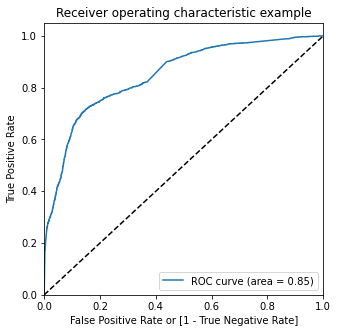

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### ROC CCurve value= 0.85 and it means the model is good.As ROC value should be close to 1

### Finding Optimal Cutoff Point

##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.674346,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.179845,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.211189,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.958155,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.231817,9170,0,1,1,1,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.570778  0.969822  0.326587
0.2   0.2  0.656309  0.924762  0.492031
0.3   0.3  0.772128  0.763539  0.777384
0.4   0.4  0.801318  0.706077  0.859600
0.5   0.5  0.803202  0.651922  0.895775
0.6   0.6  0.785154  0.563869  0.920567
0.7   0.7  0.757690  0.461348  0.939034
0.8   0.8  0.727715  0.331955  0.969896
0.9   0.9  0.691933  0.195535  0.995699


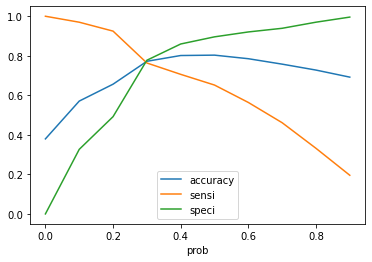

In [137]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.674346,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.179845,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.211189,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.958155,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.231817,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7721280602636534

In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','ProspectID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,ProspectID,final_predicted,Lead_Score
0,0,0.674346,7962,1,67
1,0,0.179845,5520,0,18
2,0,0.211189,1962,0,21
3,1,0.958155,1566,1,96
4,0,0.231817,9170,0,23


In [141]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1847
0     572
Name: final_predicted, dtype: int64

In [142]:
# check the precentage of final_predicted conversions

1847/float(1847+572)

0.7635386523356759

### Final conversion rate is 76%

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3073,  880],
       [ 572, 1847]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7635386523356759

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.7773842651151025

##### We have the following values for Train Data
###### Accuracy : 77%
###### Sensitivity :77%
###### Specificity :78% 


In [147]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.22261573488489755


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6773010634396773


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8430727023319616


### Precision and Recall

In [150]:
#Looking at the confusion matrix again

In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3541,  412],
       [ 842, 1577]], dtype=int64)

##### Precision
##### TP / TP + FP

In [152]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7928607340372046

##### Recall
##### TP / TP + FN

In [153]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6519222819346837

##### Using sklearn utilities for the same

In [154]:
from sklearn.metrics import precision_score, recall_score

In [155]:
?precision_score

In [156]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7928607340372046

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6519222819346837

### Precision and recall tradeoff

In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

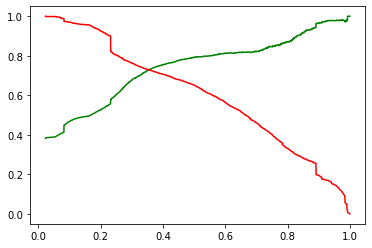

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [162]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3504,-0.293797,-0.058621,-0.108519,0.416452,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1196,-0.293797,0.305228,-0.110357,0.976446,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
8219,-0.293797,1.396773,-0.433947,-0.283540,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [163]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Marketing Management,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,1,0,0,0,0,0,0,1,0
4050,-0.293797,-0.888077,0,1,0,0,0,0,0,1,0
7201,3.403712,0.420993,1,0,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,1,0,0,0,0,0,0,1,0
8219,-0.293797,-0.433947,1,0,0,0,0,0,0,1,0


In [164]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

3504    0.298271
4050    0.890002
7201    0.158689
1196    0.297887
8219    0.234932
8747    0.081631
9048    0.359683
6524    0.247263
7693    0.062629
8187    0.890002
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Let's see the head
y_pred_1.head()

,0
3504,0.298271
4050,0.890002
7201,0.158689
1196,0.297887
8219,0.234932


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [173]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,3504,0.298271
1,1,4050,0.890002
2,0,7201,0.158689
3,0,1196,0.297887
4,1,8219,0.234932


In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [175]:
y_pred_final.head()

,Converted,ProspectID,Converted_Prob
0,0,3504,0.298271
1,1,4050,0.890002
2,0,7201,0.158689
3,0,1196,0.297887
4,1,8219,0.234932


In [176]:
# Rearranging the columns
y_pred_final = y_pred_final[['ProspectID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [177]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,Lead_Score
0,3504,0,0.298271,30
1,4050,1,0.890002,89
2,7201,0,0.158689,16
3,1196,0,0.297887,30
4,8219,1,0.234932,23


In [178]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [179]:
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,Lead_Score,final_predicted
0,3504,0,0.298271,30,0
1,4050,1,0.890002,89,1
2,7201,0,0.158689,16,0
3,1196,0,0.297887,30,0
4,8219,1,0.234932,23,0


In [180]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    786
0    256
Name: final_predicted, dtype: int64

In [181]:
#check the precentage of final_predicted conversions on test data

786/float(786+256)

0.7543186180422264

##### Final prediction of conversion target rate is 75%

In [182]:
 #Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7766385939216405

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1335,  354],
       [ 256,  786]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7543186180422264

In [186]:
# Let us calculate specificity
TN / float(TN+FP)

0.7904085257548845

##### Final values 
##### Accuracy -77%
##### sensitivity-75%
##### specificity-79%

### Precision and Recall metrics for the test set

In [187]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6894736842105263

In [188]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7543186180422264

In [189]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,ProspectID,Converted,Converted_Prob,Lead_Score,final_predicted
1,4050,1,0.890002,89,1
9,8187,0,0.890002,89,1
23,7005,1,0.989812,99,1
57,789,1,0.950730,95,1
60,4844,1,0.973665,97,1
...,...,...,...,...,...
2717,6163,1,0.933296,93,1
2718,1467,1,0.923673,92,1
2719,4781,1,0.989812,99,1
2724,8348,1,0.875004,88,1


In [190]:
hot_leads_ids = hot_leads["ProspectID"].values.reshape(-1)
hot_leads_ids

array([4050, 8187, 7005,  789, 4844, 7989, 7725, 8075, 8873, 1897, 1525,
       4409,  802,  737, 8681, 4548, 1157, 5258, 2852, 8650, 5373, 4173,
       8415, 7320, 7719, 2664, 9228,  785,  446, 3425, 1490, 8118, 4187,
       5815, 5641, 7093, 8867,  337,  211, 9062, 1594, 2489,   76, 4250,
       2460, 3983, 3407, 6647, 6314, 2584, 1614, 8594, 4359, 7877, 8268,
        305, 7121, 5791, 1578, 3248, 5535, 5964, 5137, 4662, 7883, 4028,
       2681, 5799, 5975,  373, 2121, 2674, 7089, 6617, 8946, 1722, 8787,
       1475, 2841,  505, 1995,  112, 6127, 2765, 8309, 2860, 8596, 2662,
       4149, 6529, 3566, 6499, 6931, 6438, 7326, 4771, 1481, 4775, 7009,
       2475, 2067, 7606,  999, 2791,  822, 4297, 2055, 1518, 2598, 2676,
       2042, 8104, 4568, 4732,  941, 8591, 1436, 1542, 8499, 5559, 5206,
       3321, 7082, 4772, 7245, 1454,  174, 8229, 3455, 3466, 4782, 8547,
       3268, 4832, 8490, 4194, 2439, 2114, 5541, 4778, 3267, 1388, 2016,
       8891, 8505, 5822, 7166, 7683, 3937, 4776, 47

In [191]:
res.params.sort_values(ascending=False)

What is your current occupation_Working Professional    3.700765
Lead Origin_Lead Add Form                               3.295935
Lead Source_Welingak Website                            1.998459
What is your current occupation_Unemployed              1.215213
What is your current occupation_Student                 1.126129
What is your current occupation_Other                   1.117709
Total Time Spent on Website                             0.999072
Specialization_Marketing Management                     0.205170
Do Not Email                                           -0.362810
Lead Origin_Landing Page Submission                    -0.429202
Lead Source_Referral Sites                             -0.785034
const                                                  -1.639730
dtype: float64

### Conclusion
#### Final conversion rate for the model is 76% before building the model conversion rate was  38%
#### Metrics values for both train and test are almost same.

### Most important variables to focus on to convert more leads are 
###### 1) What is your current occupation_Working Professional.
###### 2) Lead Origin_Lead Add Form.
###### 3) Lead Source_Welingak Website.